<a href="https://colab.research.google.com/github/DeeS17/exploratory_data_analysis/blob/main/sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konten


* Tahap 1. Pra-pemrosesan
    * Memuat Data
    * Mengeksplorasi Data Awal
    * Kesimpulan dan Langkah-Langkah Selanjutnya
* Tahap 2. Mengatasi Nilai-Nilai yang Hilang (Jika Ada)
    * model_year
    * cylinders
    * odometer
    * paint_color
    * is_4wd
* Tahap 3. Memperbaiki Tipe Data
* Tahap 4. Memperbaiki Kualitas Data
* Tahap 5. Memeriksa Data yang Sudah Bersih
* Tahap 6. Mempelajari Parameter Inti
    * Harga
    * Usia Kendaraan
    * Jarak tempuh
    * Jumlah silinder
    * Kondisi
* Tahap 7. Mempelajari dan Menangani Outlier
* Tahap 8. Mempelajari Parameter Inti Tanpa Outlier
    * Harga
    * Usia Kendaraan
    * Jarak tempuh
    * Jumlah silinder
    * Kondisi
* Tahap 9. Masa Berlaku Iklan
* Tahap 10. Harga Rata-Rata Setiap Jenis Kendaraan
* Tahap 11. Faktor Harga
    * sedan
    * SUV
* Tahap 12. Kesimpulan Umum

## Pendahuluan
`Crankshaft List` adalah sebuah web yang memuat ratusan iklan kendaraan gratis setiap hari. Tujuan dari proyek ini adalah untuk mempelajari faktor-faktor apa saja yang mempengaruhi harga sebuah kendaraan dari web `Crankshaft List`. 

### Tujuan
Pada dua tipe kendaraan dengan iklan terbanyak, kita akan mencari tahu apakah ada korelasi antara harga dengan lima faktor berikut:
1. Usia Kendaraan
2. Jarak Kendaraan
3. Kondisi Kendaraan
4. Jenis Transmisi Kendaraan
5. Warna Kendaraan

### Tahapan
Proyek ini terdiri dari 4 tahap:
1. `pra pemrosesan data` dengan mengatasi nilai yang hilang dan memperbaiki tipe data.
2. Kemudian `mempelajari parameter inti` yang akan menjadi dasar untuk menangani nilai `outlier`.
3. Langkah selanjutnya adalah mengobservasi data `parameter inti` setelah data `outlier` difilter.
4. Setelah itu baru saya akan mengeksplorasi data untuk melihat faktor-faktor apa saja yang mempengaruhi harga suatu kendaraan.

## Pra-pemrosesan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [ ]:
try:
  df = pd.read_csv('/datasets/vehicles_us.csv')
except:
  df = pd.read_csv('/content/vehicles_us.csv')

### Mengeksplorasi Data Awal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
28999,33500,2011.0,chevrolet corvette,like new,8.0,gas,23000.0,automatic,convertible,custom,NaN,2019-03-07,20
19089,6100,2012.0,volkswagen jetta,excellent,6.0,gas,110000.0,automatic,sedan,silver,NaN,2019-03-11,4
44920,30800,2016.0,chevrolet silverado 1500 crew,good,8.0,gas,89998.0,automatic,pickup,black,1.0,2019-01-05,44
676,2999,2012.0,subaru forester,good,4.0,gas,NaN,automatic,SUV,blue,1.0,2018-08-15,27
13793,3500,1999.0,chevrolet camaro,excellent,6.0,gas,NaN,manual,coupe,red,NaN,2018-09-30,47
19164,4400,2008.0,dodge charger,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2018-08-11,44
5811,9295,2016.0,dodge grand caravan,excellent,6.0,gas,125897.0,automatic,van,white,NaN,2018-11-05,76
5660,7000,2006.0,chevrolet silverado,good,8.0,gas,146000.0,automatic,pickup,white,1.0,2019-03-14,10
40318,3995,2001.0,toyota 4runner,good,6.0,gas,246400.0,automatic,SUV,black,1.0,2018-08-04,24
28740,11980,2006.0,toyota tundra,good,6.0,gas,96641.0,automatic,truck,silver,NaN,2018-12-13,26


Berdasarkan sampel, ada beberapa masalah yang ditemukan dan saya jelaskan per kolom.
- price: ada data yang yang harganya 1. Padahal tidak mungkin sebuah mobil berharga 1.
- model_year: model year seharusnya integer, karena tidak ada desimal pada tahun pembuatan kendaraan.
- is_4wd: lebih cocok boolean, karena hanya menunjukan informasi apakah mobil menggunakan penggerak 4 roda atau tidak.
- condition: lebih baik diganti dengan skala numerik, agar tingkatan kualitas mobil lebih mudah dianalisa. 

Ada beberapa kolom yang tidak sesuai:
- cylinders: seharusnya integer, bukan float. Karena jumlah silinder tidak ada koma.
- date_posted: masih bertipe string, seharusnya date time.

Data terdiri dari 5125 baris data, namun Ada beberapa kolom yang tidak lengkap datanya, yaitu kolom:
- model_year
- cylinders
- odometer
- paint_color
- is_4wd

Dari antara itu is_4wd yang paling banyak, hampir setengah dari seluruh baris datasetnya kosong. 

### Kesimpulan dan Langkah-Langkah Selanjutnya

Data awal yang diterima seperti data awal pada umumnya, yaitu ada beberapa data yang kurang sesuai tipe datanya. Dan data yang hilang. Yang akan saya lakukan selanjutnya adalah menyesuaikan tipe data yang kurang sesuai dan semaksimal mungkin mengisi nilai yang hilang. Selain itu, ada beberapa kolom yang perlu ditambahkan untuk membantu analisa data. Ketiga kolom tersebut adalah:
- Menambahkan hari dalam minggu ketika iklan ditayangkan.
- menambah kolom usia kendaraan ketika iklan ditayangkan.
- Menambah kolom jarak tempuh kendaraan pertahun.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Berikut yang akan saya lakukan terhadap kolom-kolom yang memiliki nilai yang hilang:
- model_year: diambil dari nilai median dari model mobil yang sama. Karena jika model mobilnya sama, artinya berada di rentang produksi yang tidak terlalu panjang.
- cylinders: Dilihat juga dari tipe mobil 
- odometer: Mungkin bisa dilihat dari usia mobil, namun jika data tersebut kurang valid dan malah merusak data akan saya drop.
- paint_color: Mungkin bisa dilihat dari warna terbanyak dari tipe mobil yang sama, namun jika data tersebut kurang valid dan malah merusak data akan saya drop.
- is_4wd: Dilihat dari tipe mobil yang sama. Karena seharusnya tipe mobil yg sama memiliki tipe penggerak roda yang sama juga.

### model_year

In [ ]:
df_fill_model_year = df.copy()

Sebelum itu saya membuat copy dari df dulu sebelum memanipulasi data.

In [ ]:
len(df_fill_model_year['model'].unique())

100

In [ ]:
len(df_fill_model_year.loc[df['model_year'].isna(), 'model'].unique())

100

Ternyata ada 100 model mobil yang terdaftar. dan dari masing" model ada data `model_year` yang hilang.

In [ ]:
model_model_year= df_fill_model_year.pivot_table(index='model', values='model_year', aggfunc=['median', 'min', 'max'])
model_model_year.columns=['median_year', 'min_year', 'max_year']
model_model_year['median_year'].round()
model_model_year['range_year'] = model_model_year['max_year'] - model_model_year['min_year']
model_model_year.describe()

,median_year,min_year,max_year,range_year
count,100.000000,100.000000,100.000000,100.000000
mean,2010.450000,1989.260000,2018.330000,29.070000
std,2.995367,19.280817,1.651782,19.591925
min,2000.000000,1908.000000,2009.000000,0.000000
25%,2008.000000,1984.000000,2018.000000,17.000000
50%,2010.750000,1995.000000,2019.000000,23.500000
75%,2013.000000,2001.000000,2019.000000,35.000000
max,2018.000000,2013.000000,2019.000000,111.000000


Ternyata hipotesis saya sebelumnya salah. Karena ternyata rentang tahun produksi cukup panjang, bahkan ada yang sampai 100 tahun. Sehingga jika dipaksakan dapat menggangu akurasi datanya. 

Jadi saya memutuskan untuk mengganti data dengan `model_year` yang kosong dengan nilai `0`. Agar baris-baris data yang hilang tersebut tetap bisa dipakai untuk analisa lainnya yang tidak melibatkan model year. Dan jika ada analisa data yang melibatkan `model_year`, maka saya akan memfilter data yang bernilai `0`.  

In [ ]:
df_fill_model_year.loc[df_fill_model_year['model_year'].isna(), 'model_year'] = 0
df_fill_model_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
df_fill_model_year.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47027,5299,2007.0,toyota prius,like new,4.0,hybrid,112000.0,automatic,hatchback,grey,NaN,2018-11-23,103
44438,6995,2012.0,toyota corolla,excellent,NaN,gas,124987.0,automatic,sedan,silver,NaN,2018-08-26,13
6515,8695,2013.0,dodge charger,excellent,6.0,gas,113650.0,automatic,sedan,NaN,NaN,2018-09-14,21
24395,4500,2007.0,honda odyssey,good,6.0,gas,151000.0,automatic,mini-van,grey,NaN,2019-02-14,12
14683,23950,2016.0,ram 1500,excellent,NaN,gas,37000.0,automatic,truck,white,1.0,2019-04-04,49
41347,43900,2017.0,gmc sierra 2500hd,good,8.0,diesel,109901.0,automatic,truck,silver,1.0,2019-04-18,34
35096,5200,0.0,subaru forester,like new,4.0,gas,180000.0,automatic,SUV,black,1.0,2019-01-01,31
43664,4300,2004.0,dodge dakota,excellent,6.0,gas,238241.0,automatic,truck,NaN,1.0,2018-09-11,42
6950,26588,2017.0,chevrolet traverse,like new,NaN,gas,38000.0,automatic,SUV,black,NaN,2019-01-14,23
24612,3500,2011.0,ford focus,excellent,4.0,gas,135000.0,automatic,sedan,blue,NaN,2018-08-07,4


Data dari `model_year` yang hilang telah terisi semua setelah mengisi nilai `NaN` dengan `0`. 

### cylinders

In [ ]:
df_fill_cylinders = df_fill_model_year.copy() 

In [ ]:
len(df_fill_cylinders.loc[df['cylinders'].isna(), 'model'].unique())

100

Setelah diperiksa, ternyata dari setiap tipe mobil ada yang tidak memiiki data silinder. Sebelum diisi, saya akan memeriksa data distribusi `cylinders`.

In [ ]:
model_cylinders = df_fill_cylinders.pivot_table(index='model', values='cylinders', aggfunc=['median', 'min', 'max'])
model_cylinders.columns=['median_cylinders', 'min_cylinders', 'max_cylinders']
model_cylinders['range_cylinders'] = model_cylinders['max_cylinders'] - model_cylinders['min_cylinders']
model_cylinders

,median_cylinders,min_cylinders,max_cylinders,range_cylinders
model,,,,
acura tl,6.0,4.0,6.0,2.0
bmw x5,6.0,6.0,8.0,2.0
buick enclave,6.0,4.0,8.0,4.0
cadillac escalade,8.0,6.0,10.0,4.0
chevrolet camaro,6.0,4.0,10.0,6.0
...,...,...,...,...
toyota sienna,6.0,4.0,8.0,4.0
toyota tacoma,6.0,4.0,8.0,4.0
toyota tundra,8.0,4.0,10.0,6.0


In [ ]:
model_cylinders.describe()

,median_cylinders,min_cylinders,max_cylinders,range_cylinders
count,100.000000,100.000000,100.00000,100.000000
mean,5.930000,4.410000,8.22000,3.810000
std,1.545636,1.256056,1.86179,1.983238
min,4.000000,3.000000,4.00000,0.000000
25%,4.000000,4.000000,6.00000,2.000000
50%,6.000000,4.000000,8.00000,4.000000
75%,8.000000,5.000000,10.00000,6.000000
max,8.000000,8.000000,12.00000,7.000000


Dari kedua tabel diatas dapat dilihat bahwa tenyata dari setiap tipe mobil memiliki jumlah silinder yang berbeda. Jumlah silinder paling kecil 4 dan yang paling besar 12 silinder. Namun rentang perbedaannya tidak sebesar tahun produksi mobil. Sehingga berdasarkan data diatas, saya memilih menggunakan `median_cylinders`, dari setiap mobil untuk mengisi data yang kosong pada kolom `cylinders`.

In [ ]:
model_cylinders.reset_index(inplace=True)
model_cylinders.drop(columns=['min_cylinders', 'max_cylinders', 'range_cylinders'], inplace=True)
model_cylinders

,model,median_cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


variabel `model_cylinders` merupakan dictionary dari model mobil dengan median silinder tipe mobil tersebut. Dictionary ini untuk mengisi nilai silinder yang kosong.

In [ ]:
df_fill_cylinders= df_fill_cylinders.merge(model_cylinders, on='model')
df_fill_cylinders.loc[df_fill_cylinders['cylinders'].isna(), 'cylinders'] = df_fill_cylinders['median_cylinders']


In [ ]:
df_fill_cylinders.drop(columns=['median_cylinders'], inplace=True)
df_fill_cylinders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 7.5+ MB


In [ ]:
df_fill_cylinders.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
49736,3200,2008.0,ford focus se,good,4.0,gas,87400.0,manual,sedan,silver,NaN,2018-12-19,9
20007,1,2018.0,dodge charger,excellent,8.0,gas,14245.0,automatic,sedan,black,1.0,2018-05-02,28
39531,41000,2017.0,gmc sierra 2500hd,good,8.0,diesel,NaN,automatic,pickup,white,1.0,2019-03-23,22
3450,5950,2010.0,hyundai sonata,like new,4.0,gas,105078.0,automatic,sedan,white,NaN,2018-05-19,89
30829,14995,2011.0,chevrolet camaro,excellent,6.0,gas,41283.0,automatic,coupe,NaN,NaN,2018-06-04,7
11787,6900,2012.0,hyundai elantra,excellent,4.0,gas,0.0,automatic,sedan,black,NaN,2019-03-28,41
43604,12000,2014.0,toyota prius,excellent,4.0,hybrid,65000.0,automatic,hatchback,red,NaN,2018-08-03,40
24625,5950,2012.0,ford focus,excellent,4.0,gas,NaN,automatic,sedan,black,NaN,2018-10-26,18
11918,6450,0.0,chevrolet tahoe,excellent,8.0,gas,NaN,automatic,SUV,blue,NaN,2018-11-29,42
7113,33990,2018.0,chevrolet silverado 1500,excellent,4.0,gas,10662.0,automatic,truck,red,1.0,2018-09-08,143


Data yang hilang di kolom `cylinders` telah terisi dari nilai `median_cylinders`. Setelah terisi kolom `median_cylinders` saya drop karena kolom tersebut sudah tidak terpakai.

### odometer

In [ ]:
df_fill_odometer = df_fill_cylinders.copy()

Saya akan menguji hipotesis usia mobil memiliki hubungan dengan odometer. Namun usia mobil belum ada. Karena itu saya akan membuat kolom usia mobil terlebih dahulu.

In [ ]:
df_fill_odometer['date_posted'] = pd.to_datetime(df_fill_odometer['date_posted'], format='%Y-%m-%d')
df_fill_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 7.5+ MB


In [ ]:
df_fill_odometer['year_posted'] = pd.DatetimeIndex(df_fill_odometer['date_posted']).year
df_fill_odometer.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018
1,3200,2004.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,black,1.0,2019-04-09,10,2019
2,8499,2009.0,bmw x5,good,6.0,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52,2019
3,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-08-11,19,2018
4,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-07-07,9,2018


saya telah menambahkan kolom tahun posting iklan tersebut. Kolom tersebut diperlukan untuk mendapatkan tahun usia mobil.

In [ ]:
df_fill_odometer['car_age'] = df_fill_odometer['year_posted'] - df_fill_odometer['model_year']
df_fill_odometer['car_age'] = df_fill_odometer['car_age'].astype(int)
df_fill_odometer.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
2498,3500,1992.0,ford f-150,excellent,8.0,gas,208000.0,automatic,truck,brown,1.0,2018-11-08,94,2018,26
5669,25499,2016.0,chevrolet silverado 1500,excellent,8.0,gas,91300.0,automatic,pickup,black,1.0,2019-03-22,91,2019,3
40267,22900,2016.0,gmc sierra 1500,excellent,6.0,gas,20497.0,automatic,truck,blue,NaN,2018-11-08,17,2018,2
9371,18499,2016.0,ram 1500,excellent,8.0,gas,57920.0,automatic,truck,NaN,1.0,2019-02-09,20,2019,3
8714,3900,2004.0,honda accord,fair,4.0,gas,172863.0,automatic,sedan,NaN,NaN,2018-07-19,23,2018,14


Data usia telah ada, maka saya akan mencoba melihat korelasinya dengan odometer. 

In [ ]:
check_corr_odo_w_age = df_fill_odometer.loc[df_fill_odometer['model_year'] > 0]
check_corr_odo_w_age.loc[check_corr_odo_w_age['model_year'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


Saya telah meyingkirkan nilai `0` pada `model_year` sebelum melihat korelasinya.

In [ ]:
check_corr_odo_w_age.loc[check_corr_odo_w_age['odometer'].isna(), 'odometer'] = 0
check_corr_odo_w_age['odometer'] = check_corr_odo_w_age['odometer'].astype(int)
check_corr_odo_w_age = check_corr_odo_w_age.query('odometer > 0')
check_corr_odo_w_age.loc[check_corr_odo_w_age['odometer'] == 0]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-175-f1d95edd1af4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_corr_odo_w_age['odometer'] = check_corr_odo_w_age['odometer'].astype(int)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


In [ ]:
check_corr_odo_w_age.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
9216,18990,2012.0,ram 1500,excellent,8.0,gas,140742,automatic,pickup,black,1.0,2018-10-31,96,2018,6
41722,18500,2011.0,cadillac escalade,excellent,8.0,gas,50900,automatic,pickup,black,1.0,2019-01-20,23,2019,8
1375,18995,2011.0,ford f-150,good,8.0,gas,101311,automatic,truck,red,1.0,2018-06-24,39,2018,7
26495,22900,2014.0,ford f150 supercrew cab xlt,good,6.0,gas,73711,automatic,pickup,white,1.0,2018-11-22,47,2018,4
27802,1,2016.0,ford mustang,excellent,10.0,gas,15519,manual,coupe,grey,1.0,2018-08-09,2,2018,2
28923,10900,2015.0,subaru impreza,excellent,4.0,gas,71000,automatic,hatchback,red,1.0,2019-04-04,18,2019,4
28555,23700,2019.0,nissan frontier crew cab sv,good,6.0,gas,12659,other,pickup,black,1.0,2019-03-13,43,2019,0
21800,12995,2013.0,nissan rogue,excellent,4.0,gas,46150,automatic,wagon,black,1.0,2019-01-28,15,2019,6
28203,21990,2013.0,chevrolet silverado 3500hd,good,8.0,gas,99748,automatic,truck,NaN,NaN,2018-10-10,23,2018,5
22912,8988,2008.0,honda cr-v,excellent,4.0,gas,142043,automatic,SUV,blue,1.0,2018-12-20,29,2018,10


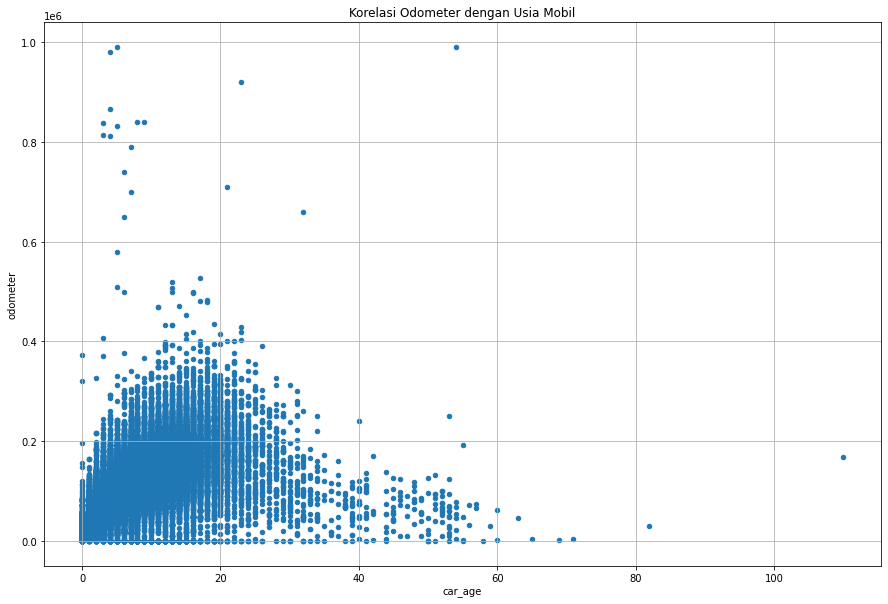

In [ ]:
check_corr_odo_w_age.plot(kind='scatter', x='car_age', y='odometer', grid=True, figsize = (15,10), title='Korelasi Odometer dengan Usia Mobil' )

In [ ]:
check_corr_odo_w_age['car_age'].corr(check_corr_odo_w_age['odometer'])

0.4828788098059994

Scatter plot menunjukan sangat tebal pada mobil usia mobil 0 - 20. Artinya mungkin kebanyakan usia mobil berada pada data berada pada rentang usia tersebut. ketika memasuki usia diatas 20 tahun, `odometer`nya cenderung lebih rendah, mungkin mobil-mobil yang pada rentang diatas 20 tahun mungkin merupakan mobil koleksi. 

Dari angka koefisiennya korelasinya juga menunjukan `usia mobil` kurang berkorelasi dengan `odometer`. 

Dari data diatas maka saya akan mengganti nilai yang hilang pada kolom `odometer` dengan nilai `0`. Seperti yang dilakukan sebelumnnya pada `model_year`.

In [ ]:
df_fill_odometer.loc[df_fill_odometer['odometer'].isna(), 'odometer'] = 0
df_fill_odometer.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
48904,11990,2012.0,gmc acadia,excellent,6.0,gas,124650.0,automatic,SUV,black,1.0,2018-08-18,85,2018,6
24042,10499,2007.0,toyota 4runner,excellent,8.0,gas,142413.0,automatic,SUV,silver,NaN,2018-12-17,112,2018,11
12071,9300,2008.0,chevrolet tahoe,good,8.0,gas,144000.0,automatic,SUV,black,1.0,2018-09-12,42,2018,10
15000,11450,2004.0,jeep wrangler,like new,6.0,gas,112723.0,manual,offroad,red,1.0,2019-02-03,139,2019,15
6046,3500,1998.0,chevrolet silverado 1500,good,8.0,gas,271000.0,automatic,truck,brown,1.0,2018-11-17,38,2018,20
11104,3295,2005.0,jeep cherokee,good,6.0,gas,155000.0,automatic,SUV,silver,NaN,2018-08-15,21,2018,13
9801,29350,2018.0,ram 1500,excellent,8.0,gas,28084.0,automatic,truck,black,1.0,2019-04-09,43,2019,1
23277,3250,2005.0,jeep grand cherokee,excellent,6.0,gas,155000.0,automatic,SUV,silver,1.0,2019-02-25,42,2019,14
43985,2500,2008.0,toyota prius,good,4.0,hybrid,0.0,automatic,hatchback,white,NaN,2018-09-30,36,2018,10
35042,10995,2008.0,ford f150,excellent,8.0,gas,148000.0,automatic,truck,white,1.0,2018-10-08,61,2018,10


In [ ]:
df_fill_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Data yang hilang paada kolom `odometer` telah terisi dengan nilai 0. Data tersebut akan difilter ketika membutuhkan kolom `odometer`.

### paint_color

Karena warna adalah selera, dan daripada saya mengisi dengan nilai `modus` yang mana mungkin dapat mengganggu akurasi data. Maka data yang hilag pada kolom `paint_color` akan saya isi dengan `unknown`. Agar baris dari data yang hilang tersebut masih dapat digunakan untuk analisa yang tidak berkaitan dengan kolom `paint_color`.

In [ ]:
df_fill_paint_color = df_fill_odometer.copy()
df_fill_paint_color.loc[df_fill_paint_color['paint_color'].isna(), 'paint_color'] = 'unknown'
df_fill_paint_color.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
28450,21000,0.0,nissan frontier crew cab sv,good,6.0,gas,0.0,other,pickup,white,NaN,2019-03-19,18,2019,2019
18354,9995,2012.0,nissan altima,excellent,6.0,gas,93608.0,other,coupe,blue,NaN,2018-06-12,33,2018,6
1249,16000,2012.0,ford f-150,excellent,6.0,gas,44000.0,automatic,pickup,unknown,1.0,2019-04-17,16,2019,7
51335,3999,2007.0,nissan murano,good,6.0,gas,0.0,automatic,SUV,grey,1.0,2018-11-08,3,2018,11
16526,5000,2004.0,chevrolet impala,excellent,6.0,gas,55562.0,automatic,sedan,unknown,NaN,2018-07-23,31,2018,14
42752,5800,2012.0,toyota corolla,good,4.0,gas,139400.0,automatic,sedan,black,NaN,2019-02-07,60,2019,7
42567,3295,2004.0,toyota corolla,good,4.0,gas,187191.0,manual,sedan,blue,NaN,2018-11-04,42,2018,14
6958,17800,2014.0,chevrolet silverado 1500,good,8.0,gas,184000.0,automatic,truck,white,1.0,2018-10-15,38,2018,4
45551,1,2017.0,ram 3500,excellent,10.0,gas,57482.0,other,truck,white,1.0,2018-11-26,73,2018,1
41804,7495,2014.0,volkswagen jetta,good,4.0,gas,158000.0,automatic,sedan,silver,NaN,2018-07-09,16,2018,4


In [ ]:
df_fill_paint_color.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Data yang hilang pada kolom `paint_color` telah terisi dengan `unknown`.

### is_4wd

In [ ]:
df_fill_is_4wd = df_fill_paint_color.copy()

In [ ]:
df_fill_is_4wd.loc[df_fill_is_4wd['is_4wd'] == 0,]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


In [ ]:
df_fill_is_4wd['is_4wd'].sum()

25572.0

Dari dua cell diatas saya memeriksa apakah ada nilai `0` pada data pada kolom `is_4wd`. Setelah difilter, ternyata tidak ada nilai `0` pada kolom `is_4wd`. Dan jika diperiksa dengan `sum()`, dan hasilnya menunjukan semua baris yang terisi pada kolom `is_4wd` bernilai `1`, atau dapat diartikan memiliki penggerak 4 roda. 

Lalu langkah selanjutnya, baris-baris yang hilang pada kolom `is_4wd` akan saya isi dengan nilai `0`. Argumen saya kemungkinan baris yang nilainya yang hilang pada kolom `is_4wd` bernilai `0` namun menjadi `NaN` disebabkan kesalahan input atau administrasi. Karena sepertinya tidak mungkin seluruh mobil didalam dataset memiliki penggerak 4 roda. 

In [ ]:
df_fill_is_4wd.loc[df_fill_is_4wd['is_4wd'].isna(), 'is_4wd'] = 0
df_fill_is_4wd.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
34987,5495,2004.0,ford f150,good,8.0,gas,0.0,automatic,truck,black,1.0,2019-02-27,9,2019,15
51033,17490,2016.0,ford econoline,good,10.0,gas,122637.0,automatic,truck,yellow,0.0,2018-12-07,81,2018,2
29826,8990,2003.0,ford f-250 sd,good,8.0,gas,142798.0,automatic,truck,unknown,1.0,2018-09-25,25,2018,15
50080,17000,2005.0,ford f250,good,8.0,diesel,125000.0,automatic,truck,black,1.0,2019-01-31,9,2019,14
39162,11997,2015.0,ford escape,excellent,4.0,gas,54814.0,automatic,SUV,grey,0.0,2018-09-08,9,2018,3
17101,17500,2007.0,chevrolet corvette,good,8.0,gas,108410.0,automatic,coupe,unknown,0.0,2018-09-25,35,2018,11
678,7100,2003.0,ford f-150,excellent,8.0,gas,136004.0,automatic,truck,grey,0.0,2019-02-21,9,2019,16
42655,5995,2010.0,toyota corolla,excellent,4.0,gas,164660.0,automatic,sedan,silver,0.0,2018-10-24,9,2018,8
31556,4900,2009.0,subaru forester,excellent,4.0,gas,137.0,automatic,wagon,unknown,1.0,2018-06-10,31,2018,9
2952,3500,2003.0,ford f-150,good,6.0,gas,224778.0,automatic,truck,black,0.0,2019-03-26,23,2019,16


In [ ]:
df_fill_is_4wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

Seluruh data telah lengkap. Maka langkah selanjutnya adalah mengganti tipe data yang kurang sesuai.

## Memperbaiki Tipe Data

In [ ]:
df_all_filled = df_fill_is_4wd.copy()
df_all_filled.sample(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
11564,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,0.0,2019-04-17,1,2019,1
37925,9000,2005.0,gmc sierra,excellent,8.0,gas,188810.0,automatic,pickup,blue,0.0,2018-10-22,22,2018,13
309,9950,2006.0,ford f-150,excellent,8.0,gas,163083.0,automatic,truck,custom,1.0,2018-09-10,9,2018,12
22889,13545,2013.0,honda cr-v,excellent,4.0,gas,82492.0,automatic,SUV,red,1.0,2018-10-13,27,2018,5
50555,15995,2012.0,ford f350,good,8.0,gas,133007.0,automatic,truck,white,0.0,2019-02-11,70,2019,7
26965,19700,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,35807.0,other,coupe,black,0.0,2019-04-05,9,2019,2
22655,8500,2010.0,honda cr-v,excellent,4.0,gas,159320.0,automatic,SUV,black,1.0,2019-02-10,61,2019,9
33131,14900,2017.0,ford edge,good,4.0,gas,129094.0,automatic,SUV,white,1.0,2019-04-05,17,2019,2
3339,11872,2014.0,hyundai sonata,like new,4.0,gas,69500.0,automatic,sedan,black,0.0,2019-02-04,1,2019,5
15394,1,2019.0,jeep wrangler,excellent,4.0,gas,3420.0,automatic,SUV,black,1.0,2019-04-03,103,2019,0


Jika dilihat dari tabel diatas ada beberapa kolom yang perlu disesuaikan tipe datanya:
- `model_year` lebih sesuai `integer` karena tahun tidak ada desimalnya.
- `condition` sebaiknya diterjemahkan menjadi numerik yang menunjukan tingkatan atau skala ordinal. Agar lebih mudah menganalisa kualitas kondisi kendaraan.
- `cylinder`lebih sesuai `integer` karena jumlah silinder tidak ada desimalnya.
- `odometer` lebih sesuai `integer`kaeena data yang ada tidak terdapat nilai desimalnya.
- `is_4wd` lebih sesuai `boolean` karena hanya 0 atau 1. 

In [ ]:
float_to_int_col = ['model_year', 'cylinders', 'odometer']

def float_to_int(dataframe, a_list):
    for elem in a_list:
        dataframe[elem] = dataframe[elem].astype(int)
    return dataframe

df_all_filled = float_to_int(df_all_filled, float_to_int_col)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,7
1,3200,2004,bmw x5,excellent,6,gas,0,automatic,SUV,black,1.0,2019-04-09,10,2019,15
2,8499,2009,bmw x5,good,6,gas,104482,automatic,SUV,blue,1.0,2019-03-04,52,2019,10
3,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1.0,2018-08-11,19,2018,3
4,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1.0,2018-07-07,9,2018,3


Kolom-kolom `model_year`, `cylinders`, &  `odometer` telah berubah dari `float` menjadi `integer`.

In [ ]:
def change_condition(value):
    if value == 'new':
        result = 5
    elif value == 'like new':
        result = 4
    elif value == 'excellent':
        result = 3
    elif value == 'good':
        result = 2
    elif value == 'fair':
        result = 1
    else:
        result = 0
    
    return result

df_all_filled['condition'] = df_all_filled['condition'].apply(change_condition)

df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,7
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,1.0,2019-04-09,10,2019,15
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,1.0,2019-03-04,52,2019,10
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,1.0,2018-08-11,19,2018,3
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,1.0,2018-07-07,9,2018,3


Data kolom `condition` telah diubah mejadi `integer`.

In [ ]:
df_all_filled['is_4wd'] = df_all_filled['is_4wd'].astype(bool)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3


kolom `is_4wd` telah berubah menjadi `boolean`. Artinya semua kolom telah disesuaikan tipe datanya.

## Memperbaiki Kualitas Data

In [ ]:
df_all_filled['weekday_posted'] = df_all_filled['date_posted'].dt.weekday
df_all_filled['month_posted'] = df_all_filled['date_posted'].dt.month
df_all_filled['day_posted'] = df_all_filled['date_posted'].dt.day
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,weekday_posted,month_posted,day_posted
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,5,6,23
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15,1,4,9
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10,0,3,4
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3,5,8,11
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3,5,7,7


kolom hari dalam minggu, tanggal, bulan, dan tahun iklan ditayangkan telah ditambahkan kedalam dataset.

In [ ]:
df_all_filled['car_age'].head()

0     7
1    15
2    10
3     3
4     3
Name: car_age, dtype: int64

Kolom usia kendaraan `car_age` telah ditambahkan pada cell sebelumnya pada bagian `1.2.3  odometer` untuk keperluan analisa data.

In [ ]:
df_all_filled['distance_per_year'] = df_all_filled['odometer'] / df_all_filled['car_age']
df_all_filled['distance_per_year'] = df_all_filled['distance_per_year'].round(decimals=2)
df_all_filled.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,weekday_posted,month_posted,day_posted,distance_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,5,6,23,20714.29
1,3200,2004,bmw x5,3,6,gas,0,automatic,SUV,black,True,2019-04-09,10,2019,15,1,4,9,0.00
2,8499,2009,bmw x5,2,6,gas,104482,automatic,SUV,blue,True,2019-03-04,52,2019,10,0,3,4,10448.20
3,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-08-11,19,2018,3,5,8,11,23228.67
4,22914,2015,bmw x5,3,6,gas,69686,automatic,SUV,white,True,2018-07-07,9,2018,3,5,7,7,23228.67


In [ ]:
df_all_filled['condition'].head()

0    2
1    3
2    2
3    3
4    3
Name: condition, dtype: int64

Telah dilakukan pada beberapa cell sebelumnya. Dibagian `1.3  Memperbaiki Tipe Data`.

## Memeriksa Data yang Sudah Bersih

In [ ]:
df_all_filled.duplicated().sum()

0

Tidak ada data duplikat.

In [ ]:
df_all_filled.columns.tolist()

['price',
 'model_year',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'type',
 'paint_color',
 'is_4wd',
 'date_posted',
 'days_listed',
 'year_posted',
 'car_age',
 'weekday_posted',
 'month_posted',
 'day_posted',
 'distance_per_year']

In [ ]:
cols_order = ['price',
 'model_year',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'type',
 'paint_color',
 'is_4wd',
 'date_posted',
 'days_listed',
 'year_posted',
 'month_posted',
 'day_posted',
 'weekday_posted',
 'car_age',
 'distance_per_year']
df_all_filled = df_all_filled[cols_order]

In [ ]:
df_all_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  month_

In [ ]:
df_all_filled.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,weekday_posted,car_age,distance_per_year
45000,1,2014,toyota tundra,3,8,gas,89606,automatic,truck,blue,True,2019-04-12,116,2019,4,12,4,5,17921.20
51468,5303,2003,nissan murano,3,6,gas,136044,automatic,truck,white,True,2019-02-24,13,2019,2,24,6,16,8502.75
32617,8500,2012,ford explorer,3,6,gas,150600,automatic,SUV,red,False,2018-12-01,12,2018,12,1,5,6,25100.00
40077,26977,2012,gmc sierra 1500,3,8,gas,66475,automatic,pickup,black,True,2018-10-07,7,2018,10,7,6,6,11079.17
39426,49950,0,gmc sierra 2500hd,4,8,gas,10600,automatic,truck,white,True,2018-08-07,30,2018,8,7,1,2018,5.25
25784,8699,2016,kia soul,3,4,gas,54699,automatic,sedan,white,False,2019-01-05,53,2019,1,5,5,3,18233.00
26492,27000,2015,ford f150 supercrew cab xlt,2,6,gas,36300,other,pickup,white,True,2019-01-27,17,2019,1,27,6,4,9075.00
28277,21900,0,chevrolet silverado 3500hd,3,8,diesel,0,automatic,truck,unknown,True,2018-07-02,100,2018,7,2,0,2018,0.00
40048,3300,2005,honda civic lx,3,4,gas,152876,automatic,coupe,unknown,False,2019-04-14,107,2019,4,14,6,14,10919.71
49523,6990,2005,toyota sienna,3,6,gas,181498,automatic,van,white,False,2018-07-02,103,2018,7,2,0,13,13961.38


tipe data sudah disesuaikan dan data yang hilang sudah terisi. Namun, ada beberapa catatan saat tahap mengeksplorasi data selanjutnya. Berikut point-pointnya:
- Pada kolom `price` ada nilai `1`. Tidak masuk akal harga sebuah mobil bernilai 1 dollar. Oleh karena itu, saat mengeksplorasi yang berhubungan dengan kolom `price` perlu difilter nilai `1` pada kolom `price`.
- Pada kolom `model_year` data yang hilang diisi dengan nilai `0`. Karena itu ketika mengeksplorasi data pada kolom `model_year` dan kolom lain yang berhubungan (`car_age` dan `distace_per_year`). Perlu difilter data nilai `0` pada kolom `model_year`.
- Pada kolom `odometer` data yang hilang diisi dengan nilai `0`. Karena itu ketika mengeksplorasi data pada kolom `odometer` dan kolom lain yang berhubungan (`distace_per_year`). Perlu difilter data nilai `0` pada kolom `odometer`.
- Pada kolom `paint_color` data yang hilang diisi dengan nilai `unknown`. Karena itu ketika mengeksplorasi data pada kolom `paint_color`, Perlu difilter data nilai `unknown` pada kolom `paint_color`.

## Mempelajari Parameter Inti 

Pada bagian ini saya akan mempelajari beberapa parameter inti, terutama pada bagaimana `outlier` mempengaruhi bentuk dan pembacaan histogram. Beberapa parameter inti tersebut adalah:   
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

### Harga

In [ ]:
df_price_wo_0 = df_all_filled.loc[df_all_filled['price'] > 1, 'price']
df_price_desc = df_price_wo_0.describe()
df_price_desc

count     50727.000000
mean      12323.308238
std       10002.603186
min           3.000000
25%        5299.000000
50%        9495.000000
75%       16907.000000
max      375000.000000
Name: price, dtype: float64

Meskipun telah difilter nilai `0` tapi ternyata masih ada nilai `3`. Tidak masuk akal ada sebuah mobil seharga 3 dollar. Menurut informasi dari https://cars.usnews.com/cars-trucks/advice/cars-for-under-1000?slide=18 yang dirilis pada tahun 2020, harga mobil termurah di Amerika seharga 500 dollar.

In [ ]:
df_price_median = df_price_desc['50%']
df_price_q1 = df_price_desc['25%']
df_price_q3 = df_price_desc['75%']
df_price_iqr = df_price_q3 - df_price_q1
df_price_low_whisker = df_price_q1 - df_price_iqr*1.5
df_price_high_whisker = df_price_q3 + df_price_iqr*1.5

lower whisker: -12113.0
Q1: 5299.0
median: 9495.0
Q3: 16907.0
upper whisker: 34319.0


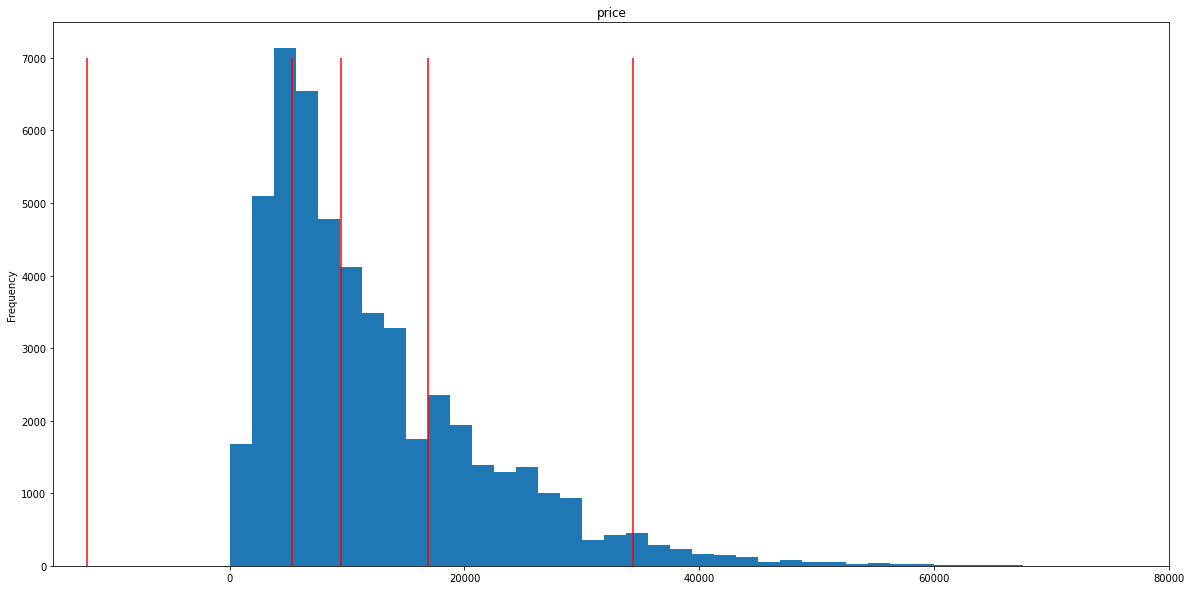

In [ ]:
df_price_wo_0.plot(kind='hist', bins=200, figsize=(20,10), title='price')
plt.xlim(-15000, 80000)
plt.vlines(x=[df_price_low_whisker, df_price_q1, df_price_median, df_price_q3, df_price_high_whisker], 
           ymin=0, 
           ymax=7000, 
           color='red'
          )

print('lower whisker: '+ str(df_price_low_whisker))
print('Q1: '+ str(df_price_q1))
print('median: '+ str(df_price_median))
print('Q3: '+ str(df_price_q3))
print('upper whisker: '+ str(df_price_high_whisker))

Dari histogram menunjukan bahwa data `25%` mobil didalam dataset harganya dibawah 5,300 dollar dan `50%` harganya dibawah 9,500 dollar. Selain itu, 25% mobil dengan harga tertinggi memiliki rentang 17,000 - 375,000 dollar. 

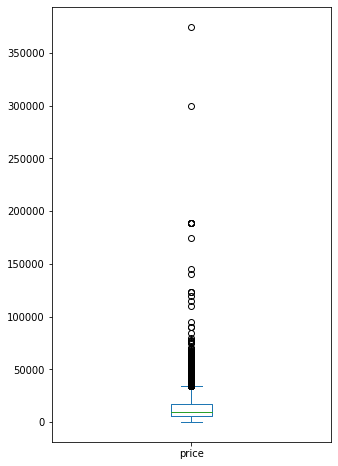

In [ ]:
df_price_wo_0.plot.box(figsize = (5,8))

Berdasarkan histogram sebelumnya tersebut memperlihatkan bahwa nilai `outlier` banyak berada pada mobil dengan harga tinggi. Dan hal tersebut juga dikonfirmasi dengan visualisasi boxplot diatas.  

### Usia Kendaraan Ketika Iklan Ditayangkan

In [ ]:
df_car_age = df_all_filled.loc[df_all_filled['model_year'] > 0, 'car_age']

Sebelum membuat histogram, Saya melakukan filter terhadap data `model_year` yang memiliki nilai `0`.

In [ ]:
df_car_age_desc = df_car_age.describe()
df_car_age_desc

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

Nilai paling kecil 0, artinya ada mobil baru atau mobil yang dijual pada tahun yang sama. Sebaliknya, nilai yang paling besar adalah 110. Mobil berusia 110 tahun mungkin adalah sebuah mobil antik atau koleksi.

In [ ]:
df_car_age_desc_median = df_car_age_desc['50%']
df_car_age_desc_q1 = df_car_age_desc['25%']
df_car_age_desc_q3 = df_car_age_desc['75%']
df_car_age_desc_iqr = df_car_age_desc_q3 - df_car_age_desc_q1
df_car_age_desc_low_whisker = df_car_age_desc_q1 - df_car_age_desc_iqr*1.5
df_car_age_desc_high_whisker = df_car_age_desc_q3 + df_car_age_desc_iqr*1.5

lower whisker: -8.0
Q1: 4.0
Median: 7.0
Q3: 12.0
upper whisker: 24.0


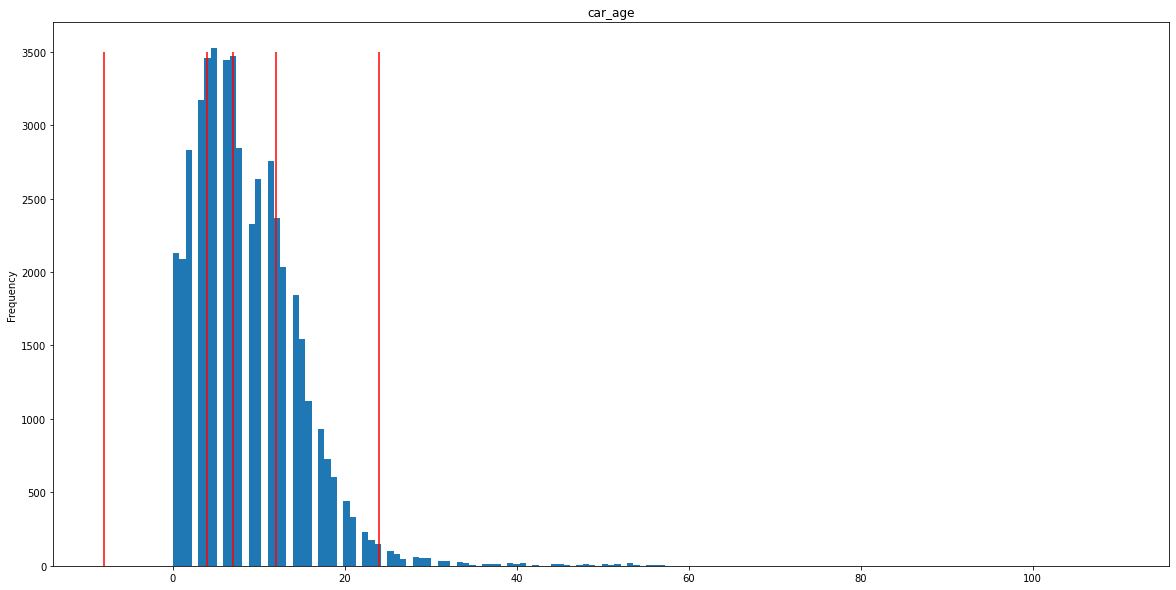

In [ ]:
df_car_age.plot(kind='hist', bins=150, figsize=(20,10), title='car_age')

plt.vlines(x=[df_car_age_desc_low_whisker, df_car_age_desc_q1, df_car_age_desc_median, df_car_age_desc_q3, df_car_age_desc_high_whisker], 
           ymin=0, 
           ymax=3500, 
           color='red'
          )

print('lower whisker: '+ str(df_car_age_desc_low_whisker))
print('Q1: '+ str(df_car_age_desc_q1))
print('Median: '+ str(df_car_age_desc_median))
print('Q3: '+ str(df_car_age_desc_q3))
print('upper whisker: '+ str(df_car_age_desc_high_whisker))

Sebanyak `25%` mobil dadialam dataset berusia 4 tahun kebawah, sedangkan setengahnya berusia 7 tahun kebawah. Namun `25%`mobil yang usialnya relatif lebih tua memiliki rentang `13 - 110 tahun`.

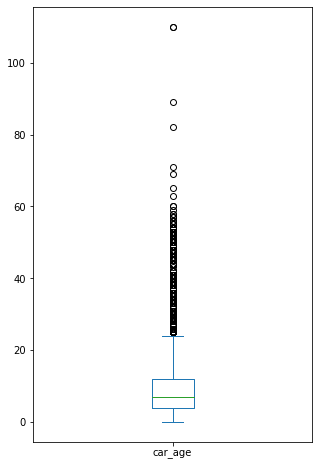

In [ ]:
df_car_age.plot.box(figsize = (5, 8))

Berdasarkan histogram sebelumnya, `25%` mobil yang usialnya relatif lebih tua memiliki sangat besar, `97 tahun`. Hal tersebut bisa menimbulkan nilai `outlier` dan dikonformasi melalui boxplot diatas.

### Jarak tempuh

In [ ]:
df_odo = df_all_filled.loc[df_all_filled['odometer'] > 0, 'odometer']

Saya melakukan filter terlebih dahulu terhadap nilai odometer yang hilang dan diganti dengan `0`.

In [ ]:
df_odo_desc = df_odo.describe()
df_odo_desc

count     43448.000000
mean     116045.484165
std       64793.926032
min           1.000000
25%       70765.000000
50%      113358.500000
75%      155033.500000
max      990000.000000
Name: odometer, dtype: float64

In [ ]:
df_odo_desc_median = df_odo_desc['50%']
df_odo_desc_q1 = df_odo_desc['25%']
df_odo_desc_q3 = df_odo_desc['75%']
df_odo_desc_iqr = df_odo_desc_q3 - df_odo_desc_q1
df_odo_desc_low_whisker = df_odo_desc_q1 - df_odo_desc_iqr*1.5
df_odo_desc_high_whisker = df_odo_desc_q3 + df_odo_desc_iqr*1.5

lower whisker: -55637.75
Q1: 70765.0
Median: 113358.5
Q3: 155033.5
upper whisker: 281436.25


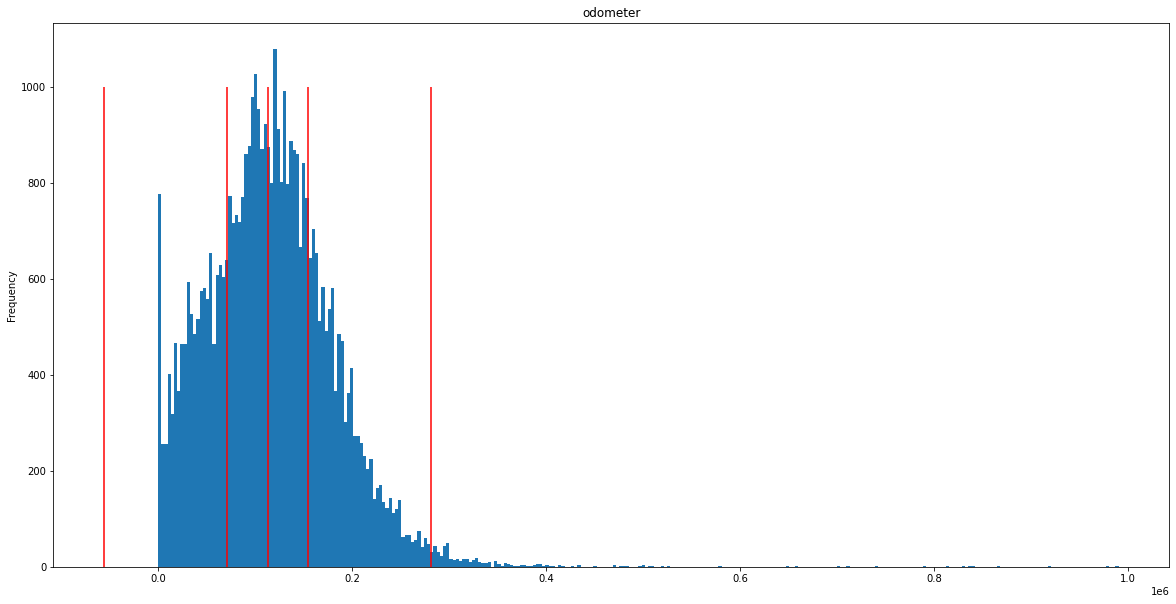

In [ ]:
df_odo.plot(kind='hist', bins=300, figsize=(20,10), title='odometer')

plt.vlines(x=[df_odo_desc_low_whisker, df_odo_desc_q1, df_odo_desc_median, df_odo_desc_q3, df_odo_desc_high_whisker], 
           ymin=0, 
           ymax=1000, 
           color='red'
          )

print('lower whisker: '+ str(df_odo_desc_low_whisker))
print('Q1: '+ str(df_odo_desc_q1))
print('Median: '+ str(df_odo_desc_median))
print('Q3: '+ str(df_odo_desc_q3))
print('upper whisker: '+ str(df_odo_desc_high_whisker))

Dari histogram diatas dapat dilihat sekitar `50%` mobil didalam dataset berada dibawah `113,400` kilometer. Namun mendekati ada penumpukan frekuensi sekitar 800 mobil yang mendekati nilai `0` kilometer. Kurang lazim tampaknya seseorang menjual mobil bekas pada kilometer yang masih terlalu rendah. Hal ini perlu ditindaklanjuti pada tahap selanjutnya.

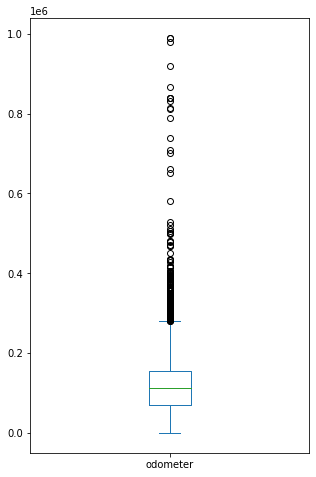

In [ ]:
df_odo.plot.box(figsize = (5, 8))

`Upper whisker` berada pada `281 ribu` dan nilai `maksimum` berada pada `990 ribu`. Rentang tersebut relatif sangat besar dibadingkan rentang 0% hingga 50% dataset. Rentang yang besar cenderung menimbulkan `outlier`. `Boxplot` diatas mengkonfirmasi hal tersebut.  

### Jumlah silinder

Karena data yang hilang pada kolom jumlah silinder telah diisi. Karena bisa langsung dibuat diagram batangnya.

In [ ]:
df_cylinders = df_all_filled.copy()
df_cylinders = df_cylinders['cylinders']
df_cylinders.describe()

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

nilai `mean` dan `median` tidak berbeda banyak. Hal itu dapat menjadi indikasi nilai `outlier` tidak adanya nilai `outlier`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


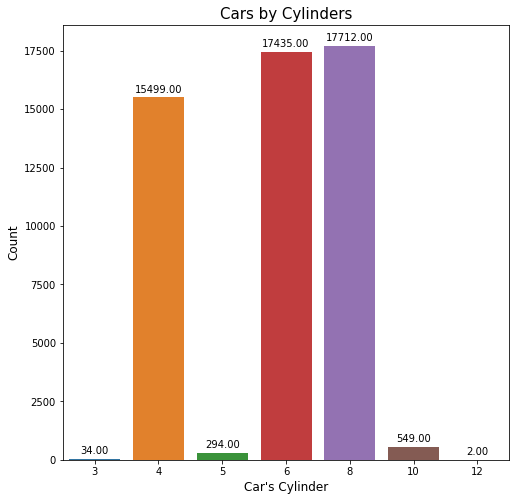

In [ ]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_cylinders)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Cylinder", size=12) 
    
plt.title('Cars by Cylinders', size=15)
plt.show()

Umumnya mobil pada dataset memiliki silinder 4, 6, dan 8. Mobil-mobil dengan silinder 3, 5, 10, dan 12 jumlahnya tidak banyak.

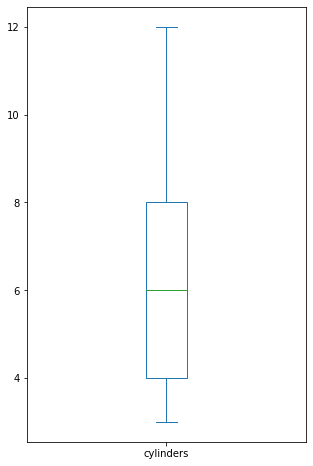

In [ ]:
df_cylinders.plot.box(figsize = (5, 8))

Dugaan saya sebelumnya benar bahwa tidak ada `outlier`. Meskipun jarak `upper whisker` lebih tinggi dibandingkan `lower whisker`.

### Kondisi

Karena nilai kondisi dari awal sudah terisi semua, maka saya tidak melakukan filter.

In [ ]:
df_condition = df_all_filled.copy()
df_condition = df_condition['condition']
df_condition.describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Nilai `mean` lebih rendah dibandingkan nilai `median`nya. Kemungkinan mobil dengan kondisi 3 kebawah, sehingga membual nilai `mean` tertarik kebawah nilai median. Selain itu, nilai `mean` dan `median` relatif sama kadang mengindikasikan minimnya nilai `outlier`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


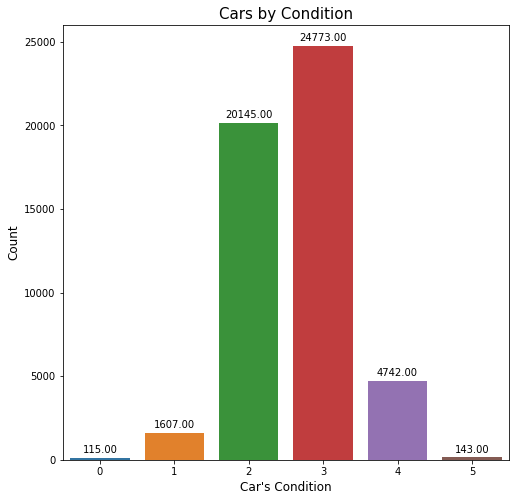

In [ ]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_condition)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Condition", size=12) 
    
plt.title('Cars by Condition', size=15)
plt.show()

Nilai kondisi terbanyak 3, yang kedua dalah 2. Hal tersebut yang menyebabkan nilai `mean` lebih rendah dibandingkan nilai `median`.

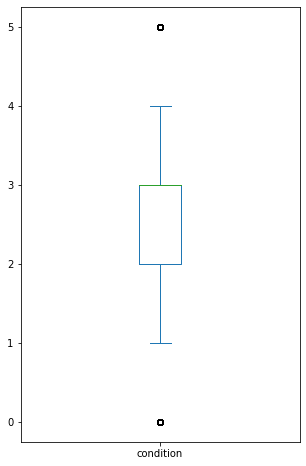

In [ ]:
df_condition.plot.box(figsize = (5, 8))

Ternyata nilai `median` dan `mean` yang relatif dekat tidak menjamin tidak adanya `outlier`. Karena ternyata nilai 0 dan 5 dianggap `outlier`. 

## Mempelajari dan Menangani Outlier

In [ ]:
buttom_price = 500

menurut data dari https://cars.usnews.com/cars-trucks/advice/cars-for-under-1000?slide=18 mobil bekas di Amerika yang masih berfungsi normal paling minim berada di harga 500 dollar.

In [ ]:
upper_price=34319
upper_age=24
upper_odo=281436.25

Batas atas `outlier` ditentukan dari `upper whisker` masing-masing parameter inti. 

In [ ]:
df_wo_ol = df_all_filled.copy()
df_wo_ol = df_wo_ol.loc[(df_wo_ol['price'] > buttom_price) & (df_wo_ol['price'] < upper_price)]
df_wo_ol = df_wo_ol.loc[df_wo_ol['car_age'] < upper_age]
df_wo_ol = df_wo_ol.loc[df_wo_ol['odometer'] < upper_odo]

## Mempelajari Parameter Inti Tanpa Outlier

### Harga

In [ ]:
df_wo_ol_prc = df_wo_ol['price'].copy()
df_wo_ol_prc_desc = df_wo_ol_prc.describe()
df_wo_ol_prc_desc

count    43963.000000
mean     11474.308782
std       7685.265733
min        534.000000
25%       5450.000000
50%       9141.000000
75%      15995.000000
max      34275.000000
Name: price, dtype: float64

Nilai minimum harga mobil didalam dataset baru sudah diatas 500 dollar.

Q1: 5450.0
median: 9141.0
Q3: 15995.0


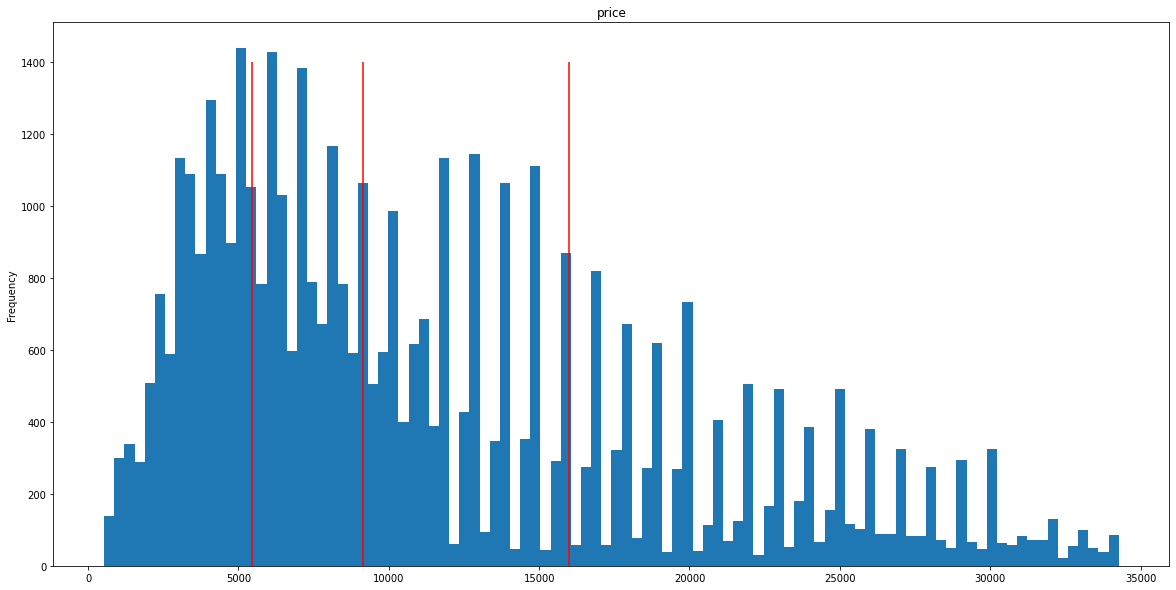

In [ ]:
df_wo_ol_prc.plot(kind='hist', bins=100, figsize=(20,10), title='price')

plt.vlines(x=[df_wo_ol_prc_desc['25%'], df_wo_ol_prc_desc['50%'], df_wo_ol_prc_desc['75%']], 
           ymin=0, 
           ymax=1400, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_prc_desc['25%']))
print('median: '+ str(df_wo_ol_prc_desc['50%']))
print('Q3: '+ str(df_wo_ol_prc_desc['75%']))


Nilai `median` setelah tanpa `outlier` turun dibandingkan dengan `outlier` yang tadinya bernilai `9,495`. Rentang harga antara nilai `min` dengan `median` lebih pendek dibandngkan antara nilai `median` dengan `max`. Hal itu disebabkan distribusi frekuensi harga mobil yang diatas `median` menyebar dibandingkan yang dibawah `median`.

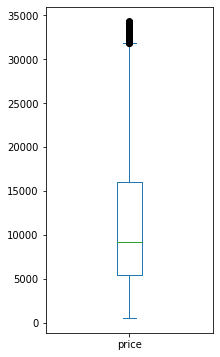

In [ ]:
df_wo_ol_prc.plot.box(figsize = (3, 6))

Meskipun telah difilter, nilai `outlier` tetap ada. Hal tersebut terjadi karena setelah difilter, nilai `q1`, `median`, `q3` , `upper`, dan `lower whisker` menjadi berubah. Dengan perubahan itu maka batas `outlier` menjadi berubah juga dan memungkinkan masih adanya data yang dianggap `outlier` pada dataset baru ini.
Namun perbedaanya nilai `outlier` pada dataset baru ini rentangnya lebih pendek dibandingkan sebelumnya.

### Usia Kendaraan

In [ ]:
df_wo_ol_age = df_wo_ol['car_age'].copy()
df_wo_ol_age_desc = df_wo_ol_age.describe()
df_wo_ol_age_desc

count    43963.000000
mean         8.363806
std          5.099919
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: car_age, dtype: float64

Usia maksimum telah berubah dari 110 menjadi 23 tahun karena telah dipotong sesuai batas `upper whisker`.

Q1: 4.0
median: 8.0
Q3: 12.0


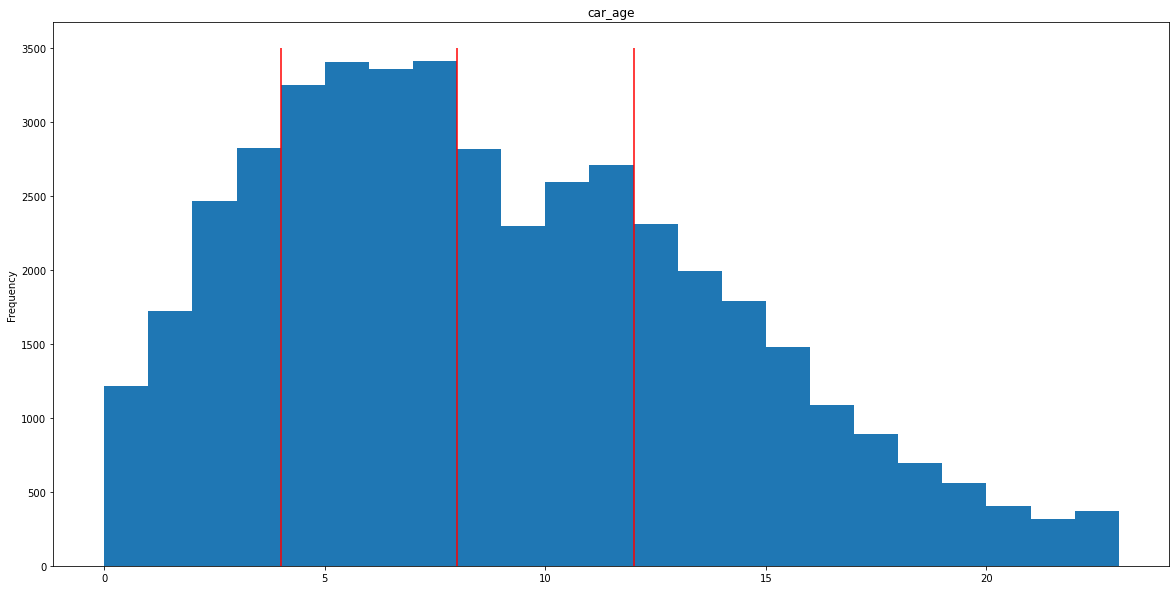

In [ ]:
df_wo_ol_age.plot(kind='hist', bins=23, figsize=(20,10), title='car_age')

plt.vlines(x=[df_wo_ol_age_desc['25%'], df_wo_ol_age_desc['50%'], df_wo_ol_age_desc['75%']], 
           ymin=0, 
           ymax=3500, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_age_desc['25%']))
print('median: '+ str(df_wo_ol_age_desc['50%']))
print('Q3: '+ str(df_wo_ol_age_desc['75%']))


Dari histogram yang telah dipotong nilai `outlier`nya, nilai `Q1` dan `Q3` tidak berubah. Nilai `median` naik satu poin dari 7 menjadi 8. Hal tersebut menarik, karena nilai `Q1`, `median`, dan `Q3` meskipun nilai `outlier`nya telah dipotong,

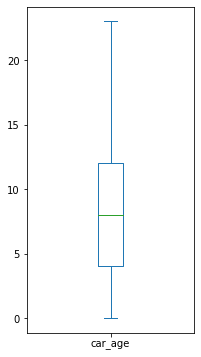

In [ ]:
df_wo_ol_age.plot.box(figsize=(3,6))

Tidak ada nilai yang dianggap `outier` pada parameter `usia` dataset baru ini. 

### Jarak tempuh

In [ ]:
df_wo_ol_odo = df_wo_ol.loc[df_wo_ol['odometer'] > 0, 'odometer'].copy()
df_wo_ol_odo_desc = df_wo_ol_odo.describe()
df_wo_ol_odo_desc

count     37020.000000
mean     117061.151567
std       57893.338822
min           1.000000
25%       76000.000000
50%      116000.000000
75%      155551.250000
max      281155.000000
Name: odometer, dtype: float64

Q1: 76000.0
median: 116000.0
Q3: 155551.25


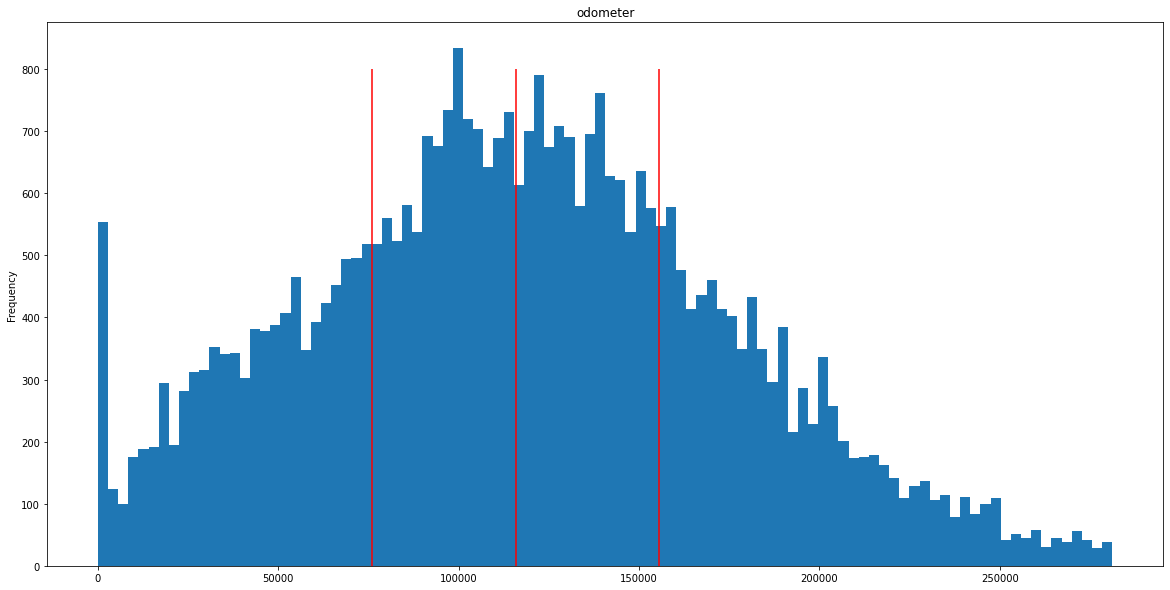

In [ ]:
df_wo_ol_odo.plot(kind='hist', bins=100, figsize=(20,10), title='odometer')

plt.vlines(x=[df_wo_ol_odo_desc['25%'], df_wo_ol_odo_desc['50%'], df_wo_ol_odo_desc['75%']], 
           ymin=0, 
           ymax=800, 
           color='red'
          )

print('Q1: '+ str(df_wo_ol_odo_desc['25%']))
print('median: '+ str(df_wo_ol_odo_desc['50%']))
print('Q3: '+ str(df_wo_ol_odo_desc['75%']))

Dari histogram data yang telah dipotong `outlier`nya, perubahan terbesar terjadi pada nilai `Q1` meningkat sekitar 6 ribu kilometer dari 70 ribu menjadi 76 ribu. Nilai `median` meningkat sekitar 3 ribu kilometer dari 113 ribu menjadi 116 ribu. Sedangkan nilai `Q3` tidak terlalu banyak berubah masih pada kisaran 155 ribu kilometer.

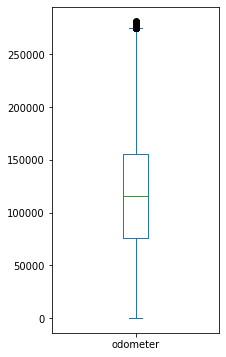

In [ ]:
df_wo_ol_odo.plot.box(figsize=(3,6))

Apa yang terjadi parameter `odometer`mirip dengan yang terjadi pada parameter `price`. Masih ada nilai `outlier` pada dataset baru, namun rentangnya lebih pendek.   

### Jumlah silinder

In [ ]:
df_wo_ol_cyl = df_wo_ol['cylinders'].copy()
df_wo_ol_cyl_desc = df_wo_ol_cyl.describe()
df_wo_ol_cyl_desc

count    43963.000000
mean         6.032914
std          1.633267
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


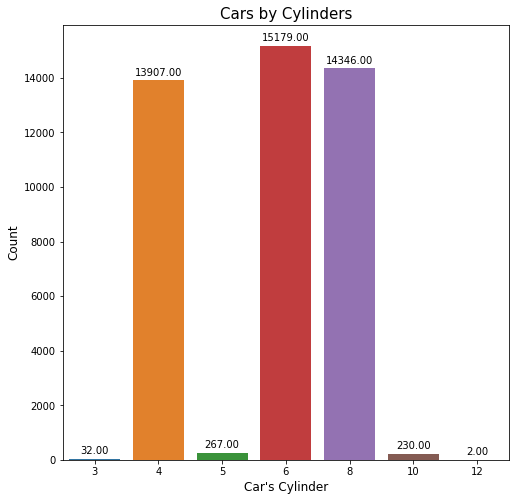

In [ ]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_wo_ol_cyl)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Cylinder", size=12) 
    
plt.title('Cars by Cylinders', size=15)
plt.show()

Setelah nilai `outlier` nya dipotong, tidak banyak berubah pada diagram batang `cylinders`. Nilai `Q1`, `median`, & `Q3` tidak berubah.

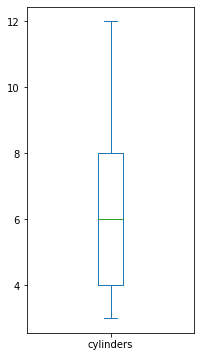

In [ ]:
df_wo_ol_cyl.plot.box(figsize=(3,6))

Pada parameter `cylinder` tidak banyak berubah, tidak ada nilai `outlier` dan `median` masih sama berada pada nilai 6.

### Kondisi

In [ ]:
df_wo_ol_con = df_wo_ol['condition'].copy()
df_wo_ol_con_desc = df_wo_ol_con.describe()
df_wo_ol_con_desc

count    43963.000000
mean         2.626527
std          0.698627
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


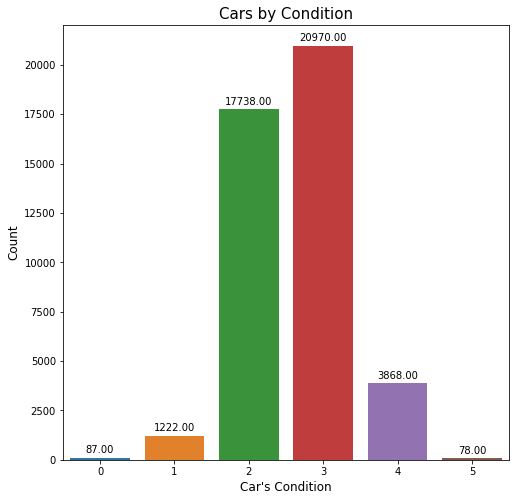

In [ ]:
plt.figure(figsize=(8, 8))
plots = sns.countplot(df_wo_ol_con)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("Count", size=12)
plt.xlabel("Car's Condition", size=12) 
    
plt.title('Cars by Condition', size=15)
plt.show()

Setelah nilai `outlier` nya dipotong, tidak banyak berubah pada diagram batang `cylinders`. Nilai `Q1`, `median`, & `Q3` tidak berubah. Kurang lebih mirip dengan yang terjadi pada kolom `cylinders`.

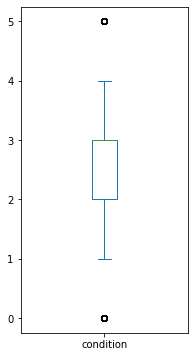

In [ ]:
df_wo_ol_con.plot.box(figsize=(3,6))

Pada parameter `condition` kurang lebih serupa dengan yang terjadi pada `cylinder`. Tidak banyak berubah. nilai `median` sama dan sama seperti dataset sebelumnya. Nilai 5 dan 0 juga dianggap `outlier`. 

## Masa Berlaku Iklan 

median: 33.0
mean: 39.58183017537475


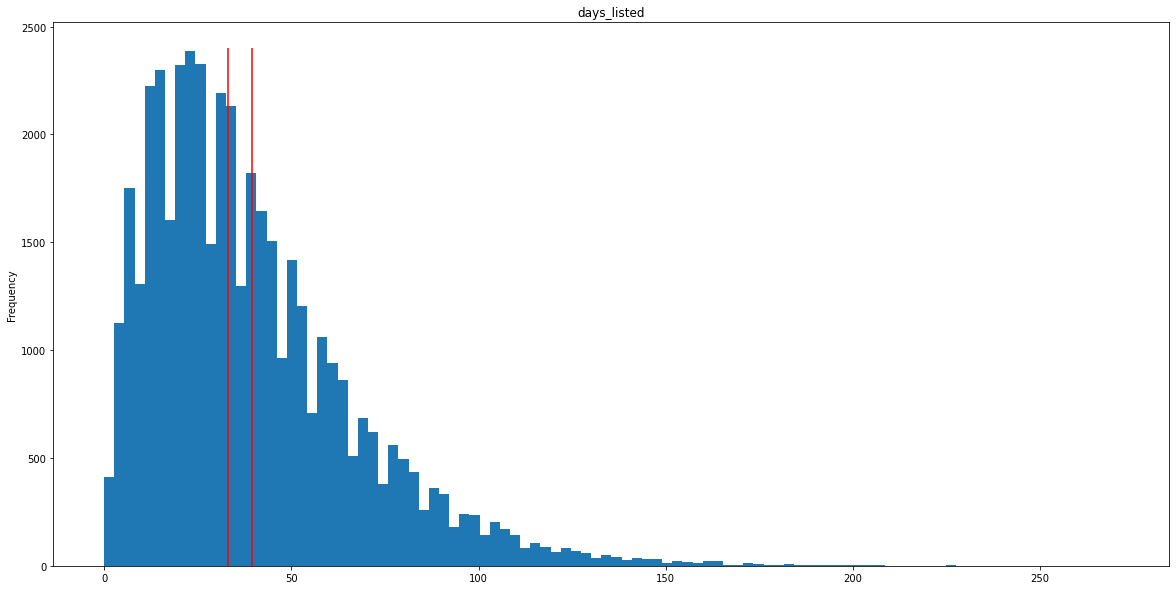

In [ ]:
days_listed_desc = df_wo_ol['days_listed'].describe()
days_listed_desc

print('median: '+ str(days_listed_desc['50%']))
print('mean: '+ str(days_listed_desc['mean']))

df_wo_ol['days_listed'].plot(kind='hist', bins=100, figsize=(20,10), title='days_listed')

plt.vlines(x=[days_listed_desc['50%'], days_listed_desc['mean']], 
           ymin=0, 
           ymax=2400, 
           color='red'
          )

plt.show()

Nilai `mean` lebih tinggi dibandingkan nilai `median` disebabkan nilai `mean` tertarik keatas karena ada mobil-mobil yang membutuhkan waktu mengiklankan relatif lebih lama dibandingkan mobil pada umumnya. Seperti yang terlihat pada histogram ada mobil-mobil yang membutuhkan waktu mengiklan lebih dari 100 hari.

In [ ]:
year_month_days_listed = df_wo_ol.pivot_table(
    index=['year_posted', 'month_posted'],
    values = 'days_listed',
    aggfunc=['median', 'mean'])

year_month_days_listed.columns = ['median', 'mean']
year_month_days_listed

median       mean
year_posted month_posted                   
2018        5                 34  39.965204
            6                 34  39.622346
            7                 33  39.361619
            8                 33  39.017838
            9                 33  39.726937
            10                33  38.896395
            11                33  39.928875
            12                33  39.093412
2019        1                 33  39.333245
            2                 33  40.285924
            3                 34  40.103519
            4                 34  39.850292

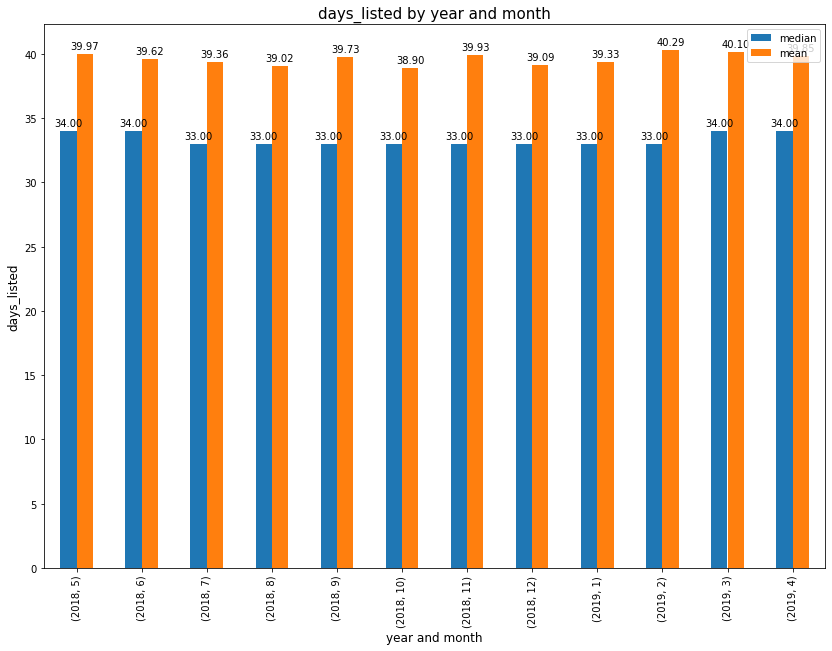

In [ ]:
plots = year_month_days_listed.plot(kind='bar', 
                            figsize=(14,10))

for bar in plots.patches:
    
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel("days_listed", size=12)
plt.xlabel("year and month", size=12)     
plt.title('days_listed by year and month', size=15)

plt.show()

Saya mengelompokan `days_listed` bedasarkan tahun dan bulan iklan diposting. Jika dilihat dari tabel dan grafik diatas, tidak banyak perbededaan nilai `mean` atau `median` dari waktu iklan ditayangkan dari beberapa bulan data dikumpulkan. 

## Harga Rata-Rata Setiap Jenis Kendaraan

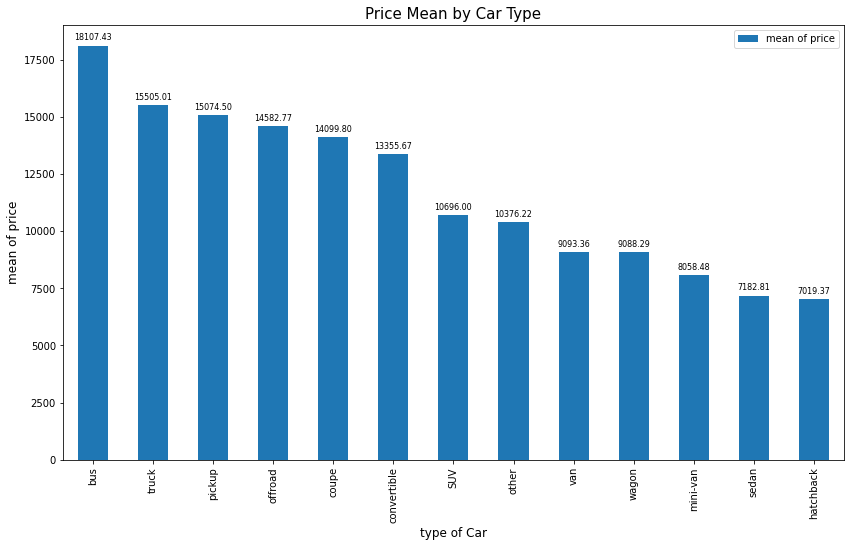

In [ ]:
price_by_type = df_wo_ol.pivot_table(
    index='type',
    values='price',
    aggfunc='mean')

price_by_type.columns = ['mean of price']

plots = price_by_type.sort_values('mean of price', ascending=False).plot(kind='bar', 
                figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('mean of price', size=12)
plt.xlabel('type of Car', size=12)
plt.title('Price Mean by Car Type', size=15)
plt.show()

Dari diagram batang diatas menjukan rata-rata harga tertinggi dimiliki oleh mobil-mobil besar, yaiut bus, truck, dan pickup. Untuk mobil penumpang SUV memiliki harga rata-rata tertinggi, sedangkan hatchback menjadi tipe mobil dengan harga rata-rata terendah. 

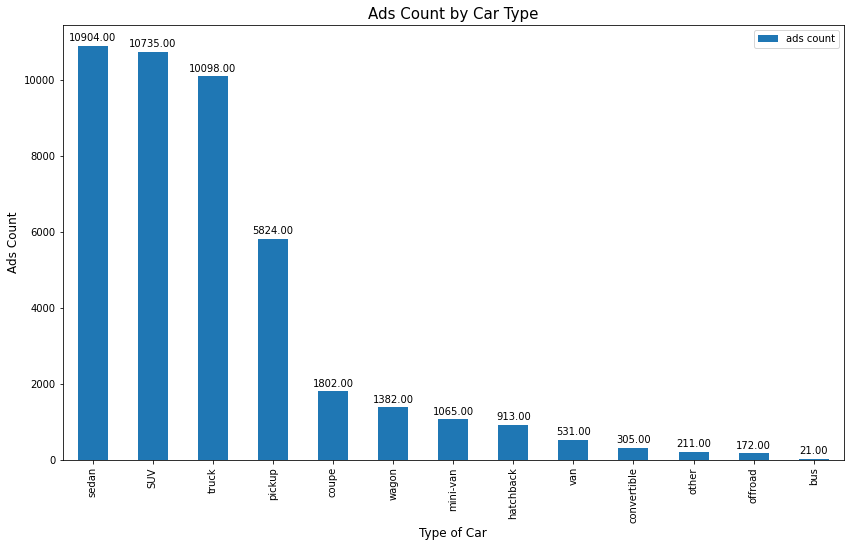

In [ ]:
ads_by_type = df_wo_ol.pivot_table(
    index='type',
    values='price',
    aggfunc='count')

ads_by_type.columns = ['ads count']

plots = ads_by_type.sort_values('ads count', ascending=False).plot(kind='bar', 
                figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Ads Count', size=12)
plt.xlabel('Type of Car', size=12)
plt.title('Ads Count by Car Type', size=15)

plt.show()

Dari diagram batang diatas, dapat dilihat mobil penumpang yang diwakili oleh `sedan` dan `SUV` mendominasi jumlah iklan. Meskipun  `bus` memiliki harga yang tinggi, tetapi tidak banyak iklannya. `Truck` memiliki iklan yang cukup banyak dan dengan harga yang cukup tinggi.

## Faktor Harga

Berdasarkan dari data jumlah iklan per tipe kendaraan. Maka saya kan mengambil 2 tipe kendaraan paling populer, yaitu `sedan` dan `SUV` untuk dilihat korelasinya. Faktor-faktor yang dilihat korelasinya adalah antara `usia`, `odomedter`, dan `kondisi` dengan `harga`. 

### sedan

In [ ]:
df_wo_ol_sedan =df_wo_ol.loc[df_wo_ol['type'] == 'sedan'].copy()
df_wo_ol_sedan_scat = df_wo_ol_sedan.loc[df_wo_ol_sedan['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition', 'price']]
df_wo_ol_sedan_cat = df_wo_ol_sedan.loc[(df_wo_ol_sedan['paint_color'] != 'unknown') & (df_wo_ol_sedan['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

Untuk yg pertama mari kita lihat `scatter plot` dan `matriks korelasi` dari faktor-faktor dengan nilai numerik, yaitu usia, jarak tempuh, dan kondisi.

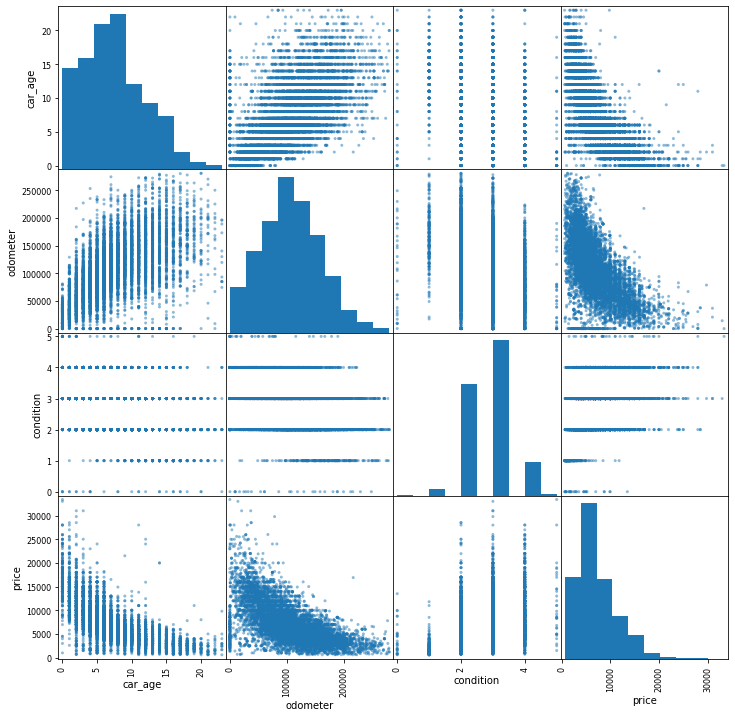

            car_age  odometer  condition     price
car_age    1.000000  0.600773  -0.304550 -0.708834
odometer   0.600773  1.000000  -0.330596 -0.631481
condition -0.304550 -0.330596   1.000000  0.322170
price     -0.708834 -0.631481   0.322170  1.000000


In [ ]:
pd.plotting.scatter_matrix(df_wo_ol_sedan_scat, figsize = (12,12))
plt.show()
print(df_wo_ol_sedan_scat.corr())

Dari matriks korelasi dapat dilihat bahwa ada korelasi negatif antara `price` dengan `car_age` dan `odometer` pada mobil `sedan`. Yang artinya, semakin tinggi usia dan kilometer mobil, harga mobil cenderung semakin rendah. 

Untuk faktor `condition` sayangnya tidak terlalu berkaitan dengan `price`. Pada plot korelasi dapat dilihat memang mobil `sedan` dengan skor `condition` 2 sampai 5 memiliki mobil-mobil dengan `price` yang lebih tinggi dibandingkan pada `condition` 0 sampai 1. Namun korelasi menjadi tidak terlalu kuat karena pada mobil dengan skor `condition` 2 sampai 5 juga masih banyak terdapat mobil dengan `price` yang rendah. 

Sekarang saya akan melihat korelasi faktor yang kategorikal. Sebelum memulai, saya akan memeriksa terlebih duhulu jumlah iklannya. 

In [ ]:
print('Jumlah iklan berdasarkan transmisi:')
print(df_wo_ol_sedan_cat['transmission'].value_counts())
print()
print('Jumlah iklan berdasarkan warna:')
print(df_wo_ol_sedan_cat['paint_color'].value_counts())

Jumlah iklan berdasarkan transmisi:
automatic    8462
manual        432
Name: transmission, dtype: int64

Jumlah iklan berdasarkan warna:
silver    1848
black     1608
grey      1476
white     1337
blue      1098
red        832
custom     239
brown      233
green      179
purple      21
yellow      16
orange       7
Name: paint_color, dtype: int64


Mobil dengan transmisi otomatis jauh lebih banyak dibandingkan manual. Selain itu, Ada beberapa warna yang jumlah iklannya dibawah 50. Oleh karena itu, warna-warna tersebut perlu difilter sebelum dibuat boxplotnya.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


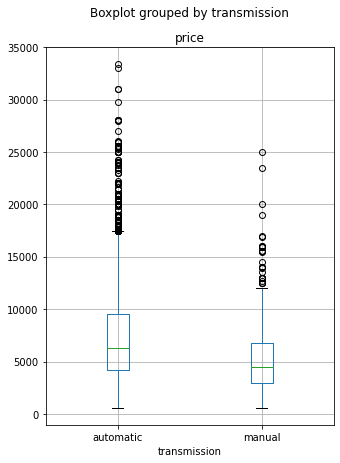

In [ ]:
df_wo_ol_sedan_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

Dari boxplot diatas dapat dilihat harga mobil `sedan` dengan `transmission` `automatic` lebih tinggi dibandingkan `manual`.

In [ ]:
df_wo_ol_sedan_cat = df_wo_ol_sedan_cat.loc[(df_wo_ol_sedan_cat['paint_color'] != 'purple') & (df_wo_ol_sedan_cat['paint_color'] != 'yellow')]
df_wo_ol_sedan_cat =  df_wo_ol_sedan_cat.loc[(df_wo_ol_sedan_cat['paint_color'] != 'orange')]
df_wo_ol_sedan_cat['paint_color'].value_counts()

silver    1848
black     1608
grey      1476
white     1337
blue      1098
red        832
custom     239
brown      233
green      179
Name: paint_color, dtype: int64

Warna-warna yang dibawah 50 iklan sudah difilter, sehingga sekarang variabel dapat digunakan untuk memunculkan `boxplot`.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


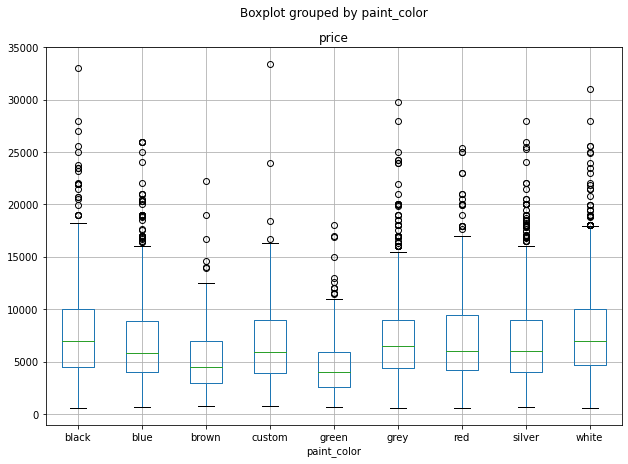

In [ ]:
df_wo_ol_sedan_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

Dari visualisasi `boxplot` diatas dapat dilihat warna `black` dan `white` cenderung lebih tinggi `price`nya dibandingkan warna lainnya. 

### SUV

In [ ]:
df_wo_ol_suv =df_wo_ol.loc[df_wo_ol['type'] == 'SUV'].copy()
df_wo_ol_suv_scat = df_wo_ol_suv.loc[df_wo_ol_suv['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition', 'price']]
df_wo_ol_suv_cat = df_wo_ol_suv.loc[(df_wo_ol_suv['paint_color'] != 'unknown') & (df_wo_ol_suv['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

seperti pada tipe mobil `sedan` sebelumnya, kita lihat terlebih dahulu `scatter plot` dan `matriks korelasi` dari faktor-faktor dengan nilai numerik. Yaitu usia, jarak tempuh, dan kondisi.

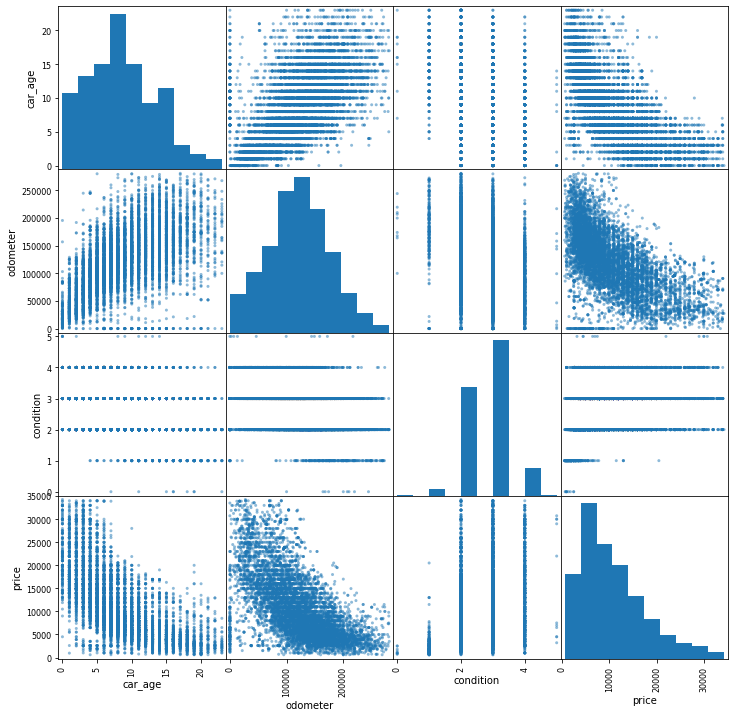

            car_age  odometer  condition     price
car_age    1.000000  0.600773  -0.304550 -0.708834
odometer   0.600773  1.000000  -0.330596 -0.631481
condition -0.304550 -0.330596   1.000000  0.322170
price     -0.708834 -0.631481   0.322170  1.000000


In [ ]:
pd.plotting.scatter_matrix(df_wo_ol_suv_scat, figsize = (12,12))
plt.show()
print(df_wo_ol_sedan_scat.corr())

Apa yang terjadi pada tipe mobil `SUV` kurang lebih serupa dengan apa yang terjadi dengan `sedan`. Korelasi negatif terjadi antara `price` dengan `car_age` dan `odometer` pada mobil `SUV`. Yang artinya, semakin tinggi usia dan kilometer mobil, harga mobil cenderung semakin rendah. 

Untuk faktor `condition` sayangnya tidak terlalu berkaitan dengan `price`. Pada plot korelasi dapat dilihat memang mobil `SUV` dengan skor `condition` 2 sampai 5 memiliki mobil-mobil dengan `price` yang lebih tinggi dibandingkan pada `condition` 0 sampai 1. Namun korelasi menjadi tidak terlalu kuat karena pada mobil `SUV` dengan skor `condition` 2 sampai 5 juga masih banyak terdapat mobil dengan `price` yang rendah. 

Sekarang saya akan melihat korelasi faktor yang kategorikal. Sebelum memulai, saya akan memeriksa terlebih dahulu jumlah iklannya.

In [ ]:
print('Jumlah iklan mobil SUV berdasarkan transmisi:')
print(df_wo_ol_suv_cat['transmission'].value_counts())
print()
print('Jumlah iklan mobil SUV berdasarkan warna:')
print(df_wo_ol_suv_cat['paint_color'].value_counts())

Jumlah iklan mobil SUV berdasarkan transmisi:
automatic    8389
manual        338
Name: transmission, dtype: int64

Jumlah iklan mobil SUV berdasarkan warna:
black     1848
white     1670
silver    1368
grey      1054
blue       904
red        801
green      371
brown      315
custom     251
orange      69
yellow      39
purple      37
Name: paint_color, dtype: int64


Serupa dengan tipe mobil `sedan`, mobil `SUV` dengan transmisi otomatis jauh lebih banyak dibandingkan manual. Selain itu, warna kuning dan ungu iklannya dibawah 50. Oleh karena itu, kedua warna tersebut tersebut perlu difilter sebelum dibuat boxplotnya.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


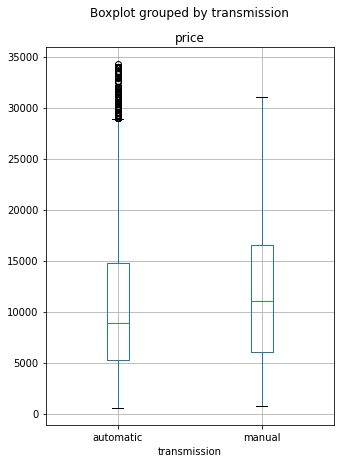

,SUV price mean
transmission,
automatic,10629.527357
manual,11789.532544


In [ ]:
df_wo_ol_suv_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

suv_mean = df_wo_ol_suv_cat.pivot_table(index='transmission', values='price', aggfunc='mean')
suv_mean.columns = ['SUV price mean']
suv_mean

Hasilnya menarik karena berbeda dengan `sedan`. Pada `SUV` transmisi `manual` cenderung lebih tinggi dibandingkan `automatic`. Hal tersebut ditunjukan dari nilai `mean` dan `median`nya. 

In [ ]:
df_wo_ol_suv_cat = df_wo_ol_suv_cat.loc[(df_wo_ol_suv_cat['paint_color'] != 'yellow') & (df_wo_ol_suv_cat['paint_color'] != 'purple')]
df_wo_ol_suv_cat['paint_color'].value_counts()

black     1848
white     1670
silver    1368
grey      1054
blue       904
red        801
green      371
brown      315
custom     251
orange      69
Name: paint_color, dtype: int64

Seluruh warna yang ada jumlah iklannya sudah diatas 50. Karena itu `boxplot` sudah bisa dilakukan.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


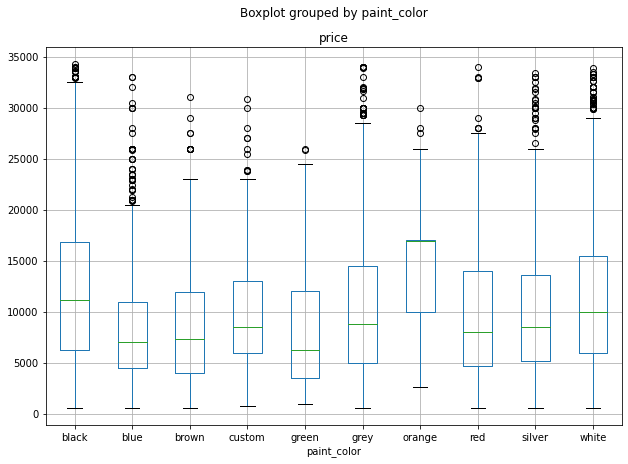

In [ ]:
df_wo_ol_suv_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

Berdasarkan boxplot diatas, pada tipe `SUV` mobil dengan warna `black` dan `white` lebih tinggi dibandingkan warna lainnya. Meskipun jumlahnya tidak banyak, warna `orange` juga memiliki harga yang relatif lebih tinggi dibandingkan warna lainnya.  

## Kesimpulan Umum

Sebelum memulai kesimpulan umum saya ada rasa penasaran untuk melihat apakah tipe mobil mempengaruhi `days_listed`. Ternyata `days_listed` rata-ratanya kurang lebih mirip disekitar `40 hari`, kecuali pada `bus`.

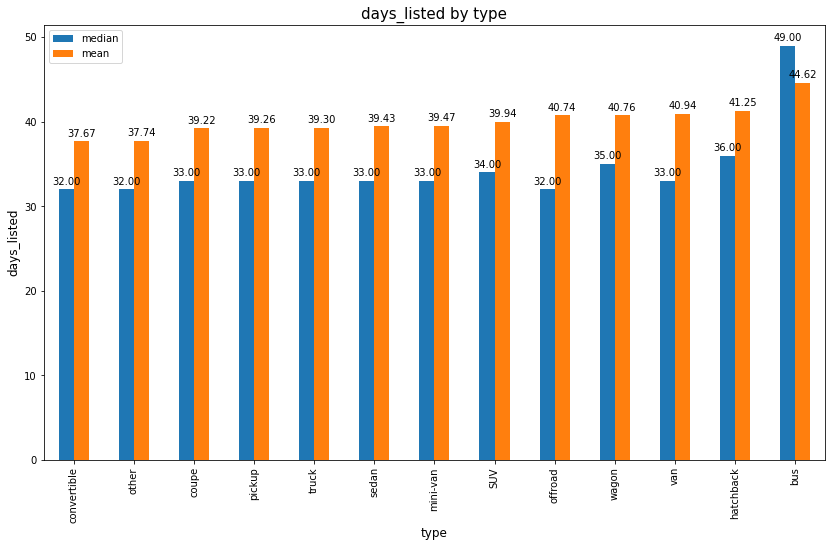

In [ ]:
type_days_listed = df_wo_ol.pivot_table(
    index='type',
    values = 'days_listed',
    aggfunc=['median', 'mean'])

type_days_listed.columns = ['median', 'mean']

plots = type_days_listed.sort_values('mean').plot(kind='bar', 
                    figsize=(14,8))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('days_listed', size=12)
plt.xlabel('type', size=12)
plt.title('days_listed by type', size=15)

plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


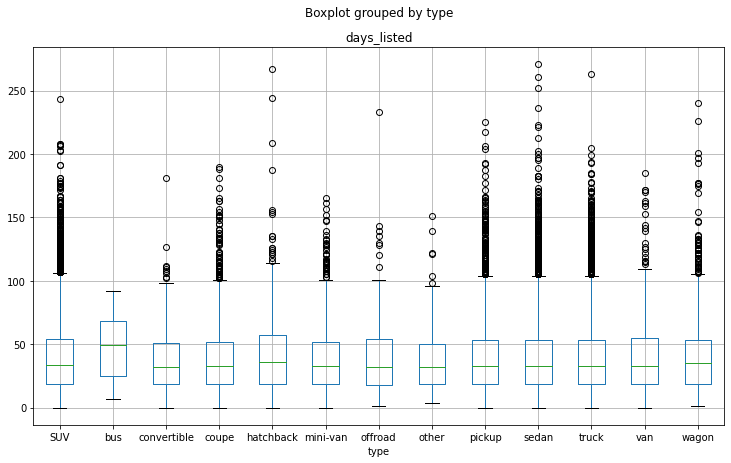

In [ ]:
df_wo_ol.boxplot(column='days_listed', by='type', figsize=(12,7))
plt.show()

Berdasarkan eksplorasi yang telah dilakukan sebelumnya, ditemukan beberapa faktor yang mempengaruhi harga mobil. Faktor pertama adalah `tipe mobil`. Faktor `Tipe mobil` bersifat kategorikal. Mobil - mobil besar seperti `bus`, `truck`, `pickup`, dan `'offroad` memiliki rata-rata harga antara sekitar 15,000 hingga 17,500 dollar. Selanjutnya mobil sedan mewah `coupe` dan `convertible` dengan harga rata-rata 12,500 - 15,000 dollar. Setelah itu baru masuk ke mobil penumpang dengah harga rata-rata sekitar 10,000 hinga 7,500 dollar. Mobil `SUV` menjadi mobil penumpang dengan harga rata-rata tertinggi berada, sedangkan `hatchback` sebaliknya.

Selain tipe, faktor kategorikal yang cukup berpengaruh terhadap harga adalah `warna`. Kendaraan dengan `warna` `putih` dan `hitam` relatif lebih tinggi dibandingkan `warna` lainnya. Mungkin karena `warna` `putih` dan `hitam` secara selera cukup netral sehingga relatif dapat diterima oleh banyak kalangan. Warna yang tidak umum seperti `orange` memiliki harga yang relatif tinggi pada `tipe` mobil `SUV`. Namun jumlahnya tidak banyak dan tidak terjadi pada `sedan`.

`Transmisi` kendaraan juga dapat menjadi penentu harga kendaraan. Awal saya memperkirakan pada era modern ini mobil dengan `transmisi` `automatic` harganya lebih tinggi karena lebih banyak peminat mobil bertransmisi `automatic` dibandingkan `manual`. Namun uniknya hal tersebut tidak terjadi secara universal. Berdasarkan eksplorasi yang dilakukan pada tipe mobil `sedan` hal tersebut berlaku, namun tidak pada `SUV`. 

Pada faktor numerik `usia` dan `jarak tempuh` kendaraan berpengaruh terhadap harga mobil. Kedua faktor tersebut berkorelasi negatif terhadap harga mobil. artinya semakin tinggi `usia` dan semakin jauh `jarak tempuh` suatu mobil, maka harganya cenderung semakin rendah. Hal dapat disebabkan persepsi konsumen melihat faktor `usia` dan `jarak tempuh` sebagai salah satu faktor utama yang mengurangi daya pakai suatu mobil. 